<a href="https://colab.research.google.com/github/ftsantos/fraudes/blob/main/previsao_de_fraudes_em_cartao_de_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão de Fraudes em Cartão de Crédito**
Projeto de um problema de classificação com Machine Learning em dados desbalanceados.

## **O Problema** 

Fraudes em cartões de créditos é um dos principais problemas que instituições oferecedoras de crédito tem. Tais fraudes causam muitos prejuízos para as operadoras, e em uma escala muito alta! Precisamos de uma solução para identificar de antemão quem são esses fraudadores!

## **O Objetivo** 
Propor um modelo para prever fraudes na passagem de um cartão de crédito. Esse modelo deve levar em consideração o contexto de negócio das operadoras de cartão. 

## **As Etapas do Projeto** 
1. Obtenção e Importação dos Dados
2. Análise Exploratória dos Dados
3. Pré-processamento dos Dados
4. Processo de Modelagem
5. Considerações Finais

---
# **Etapa 1.** Obtenção e Importação dos Dados

**Origem dos dados**:

https://www.kaggle.com/mlg-ulb/creditcardfraud

**Descrição da base**

* A base contém apenas variáveis de entrada numéricas que são o resultado de uma transformação PCA;
* Características V1, V2, … V28 são os principais componentes obtidos com PCA;
* As únicas características que não foram transformadas com PCA são 'Time' e 'Amount'. 
* O recurso 'Time' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. 
* O recurso 'Amount' é o valor da transação, esse recurso pode ser usado para aprendizado sensível ao custo dependente de exemplo. 
* O recurso 'Class' é a variável de resposta e assume valor 1 em caso de fraude e 0 caso contrário.

## **Importação dos Dados** 

In [1]:
# Permitir o Google Colab utilizar arquivos do Google Drive

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importação dos dados direto do site da UCI
import pandas as pd

caminho_base = '/content/drive/MyDrive/dados/'
base_trabalhada = caminho_base + 'creditcard.csv'

dados = pd.read_csv(base_trabalhada)  
dados.sample(10) 

Time         V1         V2        V3        V4        V5  \
182559  125455.0  -0.684890   0.932883  1.751202 -0.301226 -0.695380   
271853  164783.0 -18.479164 -15.726967 -9.410119  9.739257 -7.635013   
97028    66045.0   1.344305  -1.467015  1.213524 -1.451546 -2.078490   
84137    60177.0  -0.794114   0.071028  0.550247  0.949122 -0.274155   
187563  127588.0   2.062010  -0.251243 -0.673496  0.212061 -0.144997   
60808    49514.0   1.210134  -0.305056  1.000743  0.767550 -1.007936   
106779   70119.0  -1.455870  -1.766999  2.008452 -1.754491 -1.535569   
164548  116801.0   2.169039  -1.935233 -0.050786 -1.733660 -1.839504   
23778    32911.0   0.770689  -0.844013 -0.250355  0.392618 -0.550396   
171251  120555.0   2.048041   0.126699 -1.799055  0.229594  0.658641   

              V6        V7        V8        V9  ...       V21       V22  \
182559  0.820428 -1.587418 -3.258637 -0.004759  ... -0.533217  0.064980   
271853  3.553671  4.550106  0.008685 -0.946745  ... -0.037107 -1.706726   
97028   0.059315 -1.765040  0.166011 -1.502412  ...  0.136968  0.689560   
84137   0.132535  1.938221 -0.270942 -0.866389  ...  0.329462  0.415902   
187563 -0.144118 -0.420578 -0.069406  1.229979  ... -0.240548 -0.488879   
60808  -0.065560 -0.747023  0.199867  1.223669  ... -0.142518 -0.302288   
106779 -0.318675 -1.575088  0.764417 -1.565296  ...  0.123729  0.400701   
164548  0.551146 -2.153401  0.274997 -0.560420  ...  0.071166  0.640005   
23778  -0.580753  0.386683 -0.160713  0.347482  ...  0.081475 -0.196602   
171251 -0.374338  0.113163 -0.099069  0.180046  ... -0.325091 -0.847980   

              V23       V24       V25       V26       V27       V28   Amount  \
182559  -0.086526  1.113816  1.223179  0.347707  0.042823  0.189553    18.80   
271853 -10.117548  1.250139 -2.141659  0.173716  2.670597 -3.095313  1350.90   
97028   -0.100045  0.024721  0.206665 -0.044594  0.071310  0.033961    63.00   
84137    0.550981 -0.341141  0.011840 -0.303812  0.056430  0.185671   344.90   
187563   0.236585 -1.026571 -0.261901 -0.562245  0.039487 -0.039839     4.99   
60808   -0.012347 -0.125520  0.261817  0.353371  0.004662  0.018931    11.50   
106779  -0.018931  0.564981  0.273659 -0.186488 -0.058992 -0.205739    83.04   
164548   0.104289 -1.051170 -0.450480 -0.049575  0.067009 -0.039947    54.00   
23778   -0.266691  0.154336  0.351355  1.096428 -0.130621  0.031226   254.98   
171251   0.282493  0.199343 -0.233139  0.170611 -0.064214 -0.042103     4.49   

        Class  
182559      0  
271853      0  
97028       0  
84137       0  
187563      0  
60808       0  
106779      0  
164548      0  
23778       0  
171251      0  

[10 rows x 31 columns]

In [5]:
# verificar as informações das características
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Verificar se existem dados vazios
dados.isnull().sum()
# Não há dados vazios. 
# Caso contrário, era preciso processar estes dados, simplesmente excluindo os registros ou subtituindo pela média dos outros dados ou outra abordagem

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# contado os casos de fraude e não fraude
dados['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
dados['Class'].value_counts()/dados.shape[0]

0    0.998273
1    0.001727
Name: Class, dtype: float64

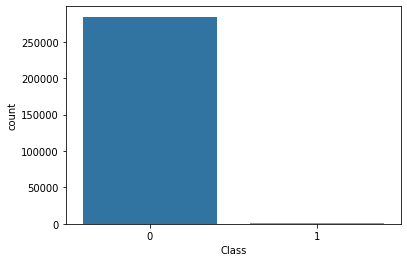

In [ ]:
import seaborn as sns

sns.countplot(x = dados['Class']);

---
# **Etapa 2.** Análise Exploratória dos Dados

In [11]:
#sweetviz faz análise automático de dados
!pip install sweetviz 

     |████████████████████████████████| 15.1 MB 3.7 MB/s 


                                             |          | [  0%]   00:00 -> (? left)


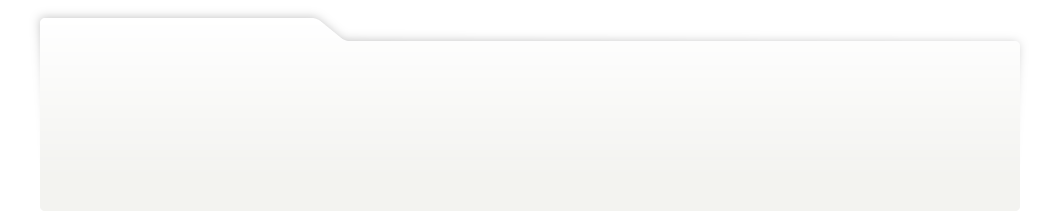
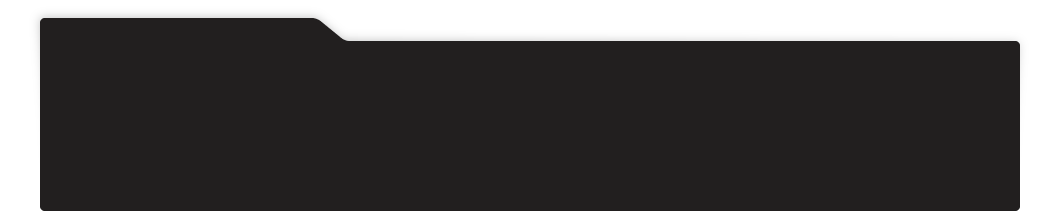
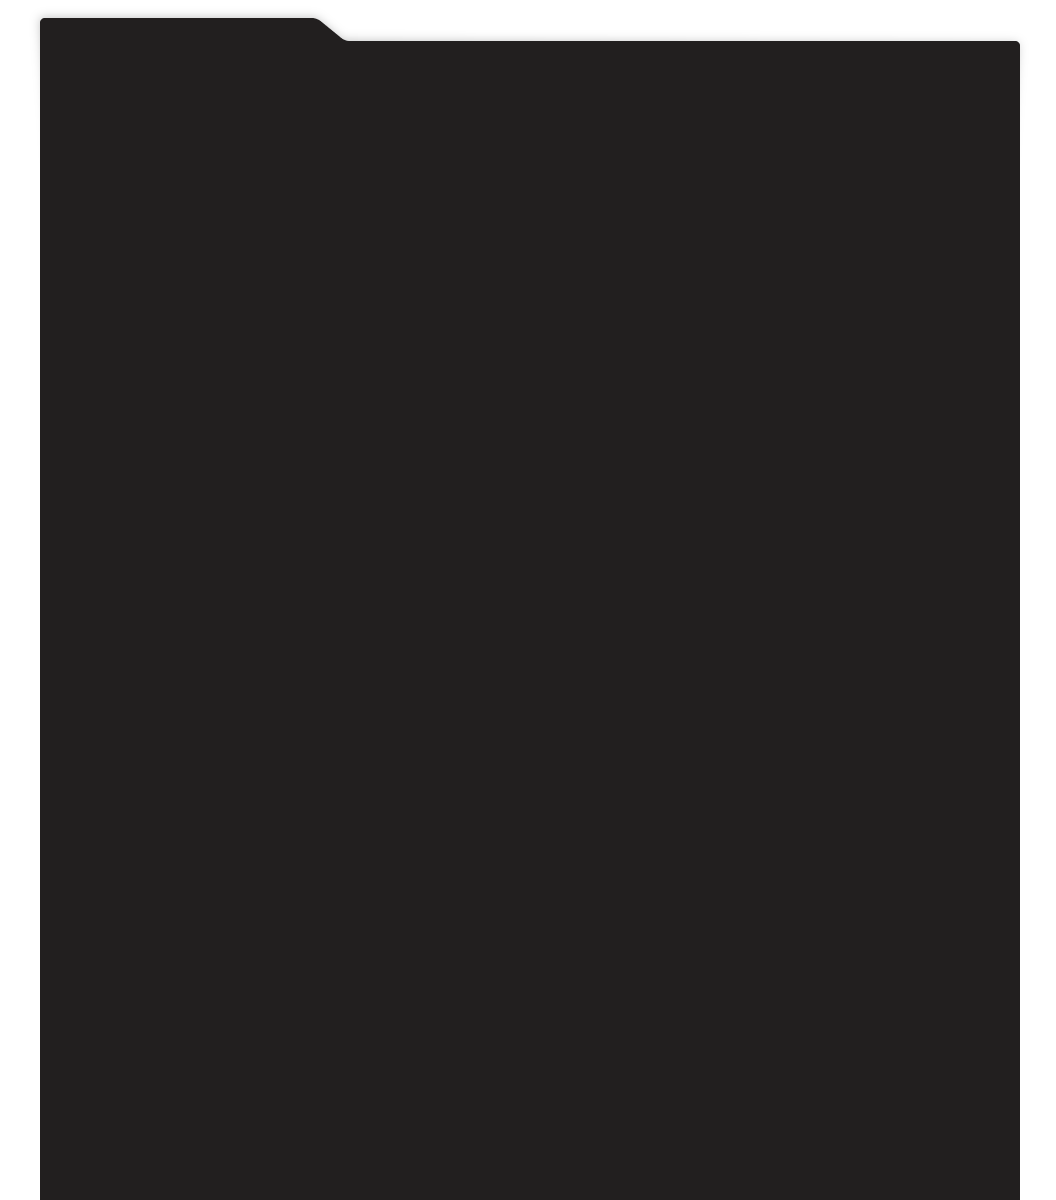
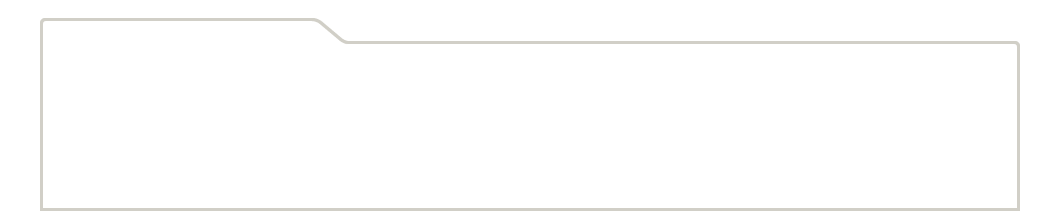
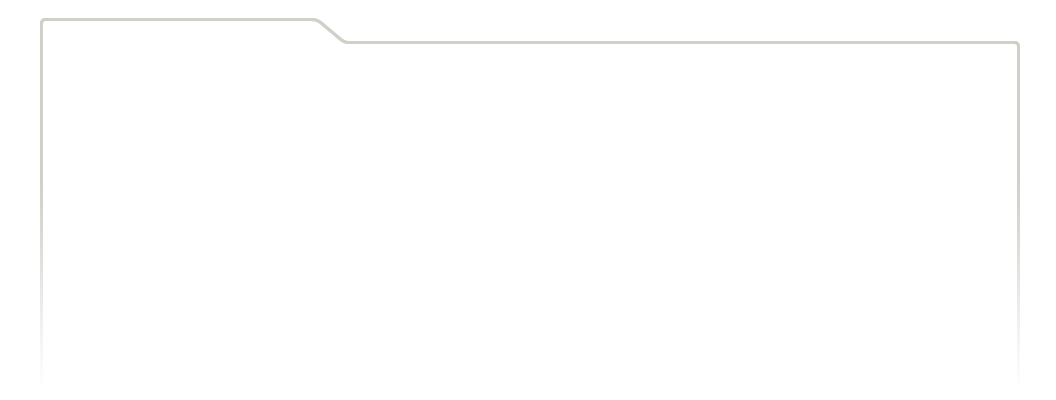
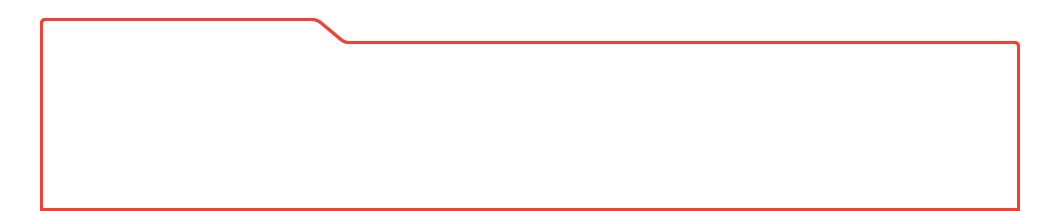
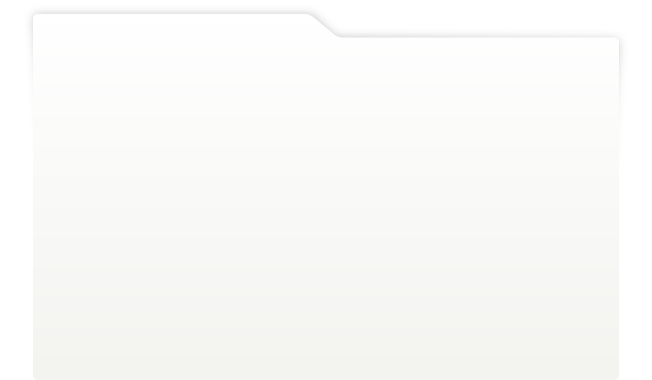
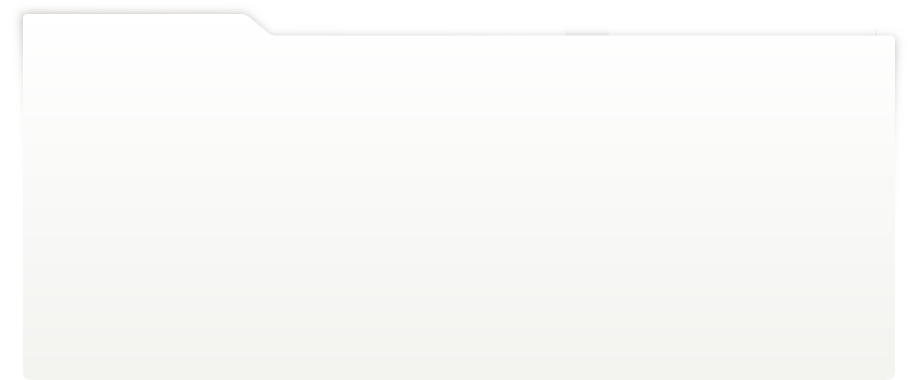
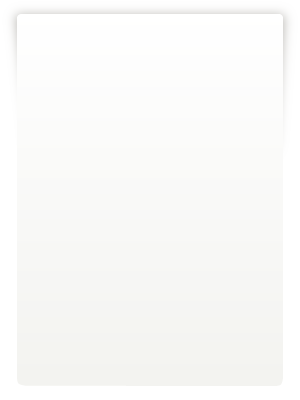
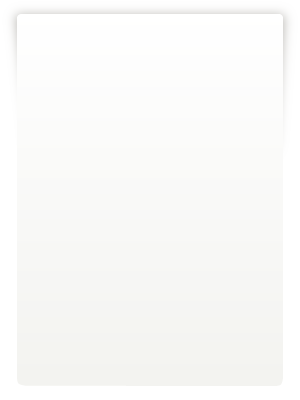
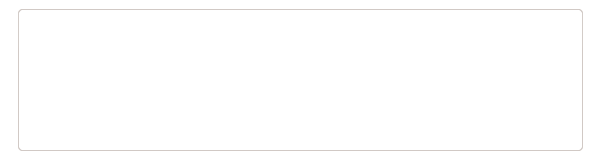
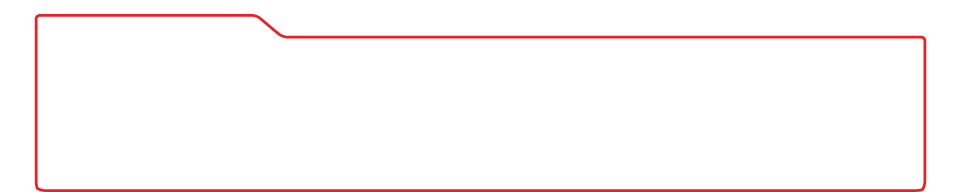
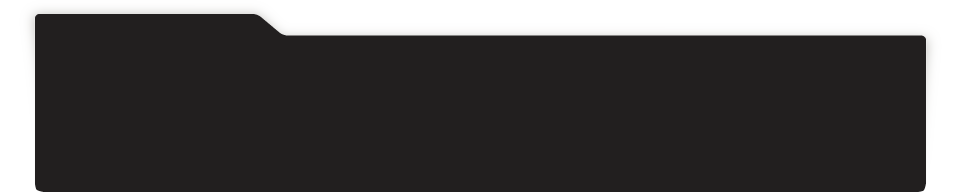
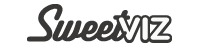
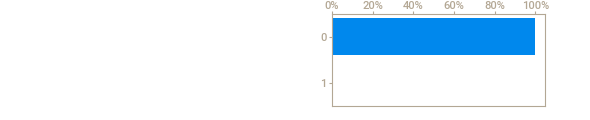
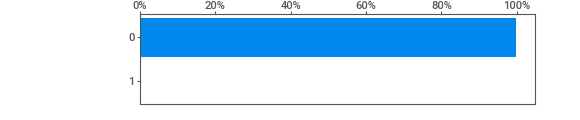
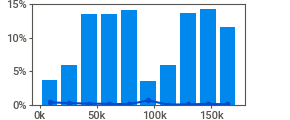
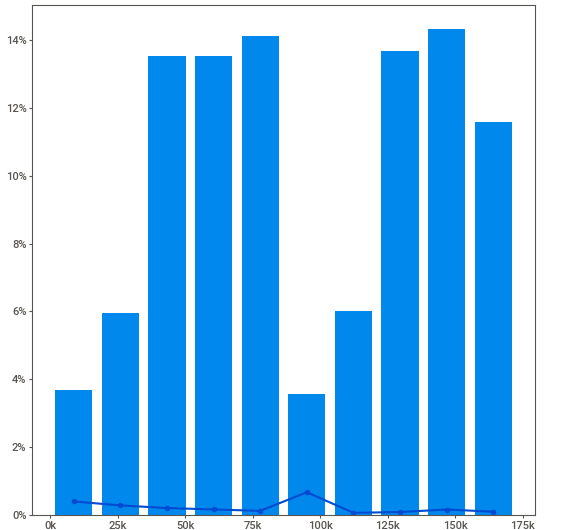
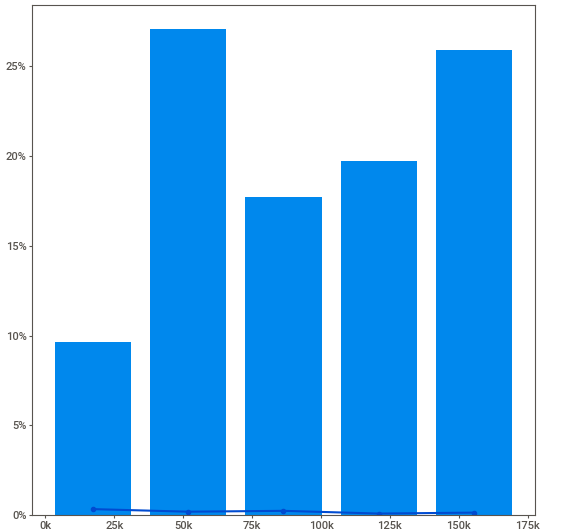
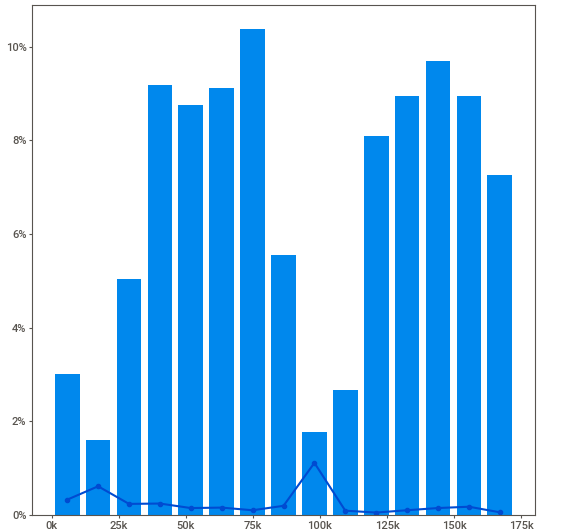
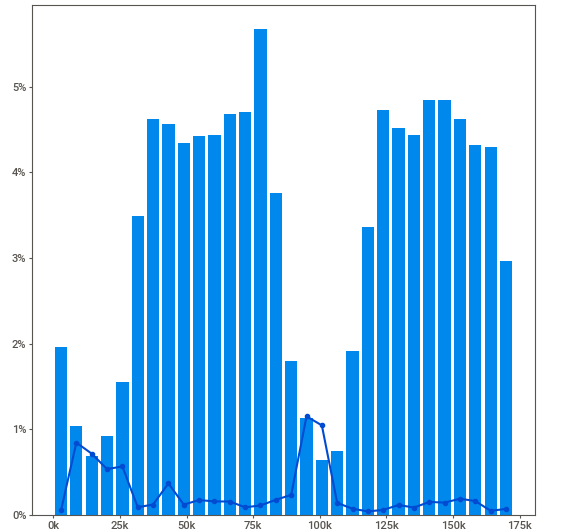
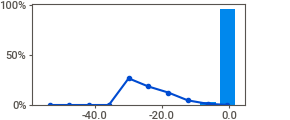
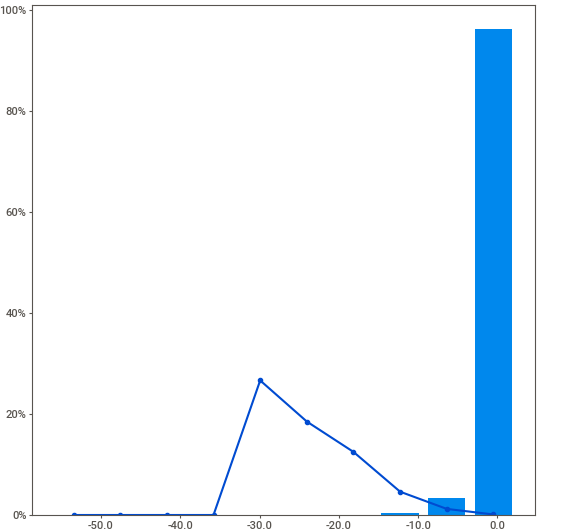
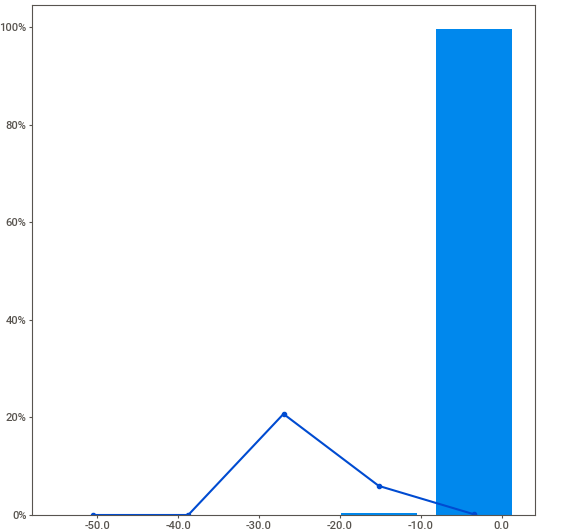
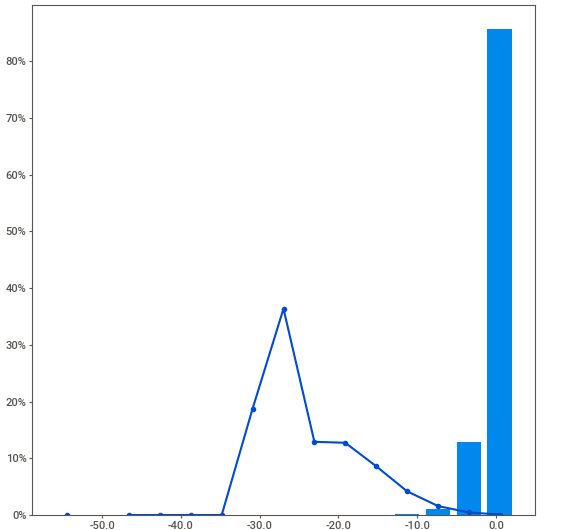
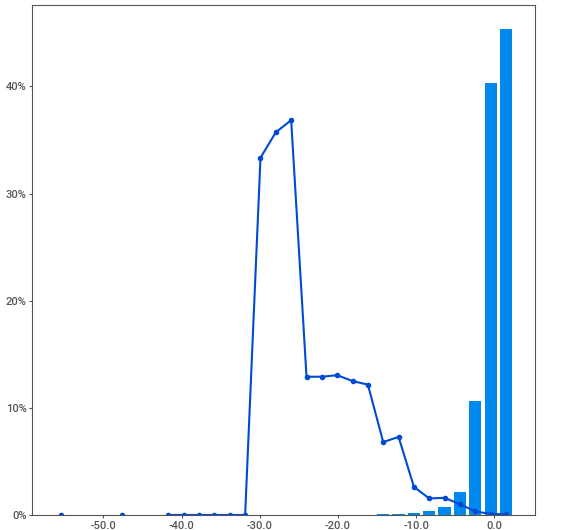
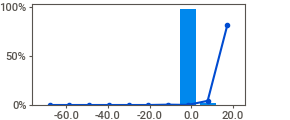
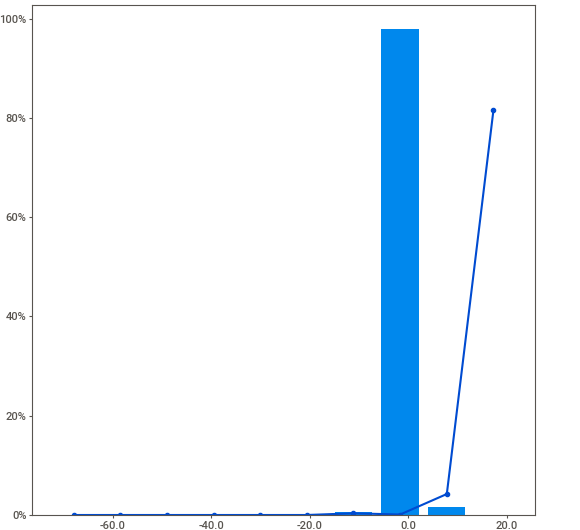
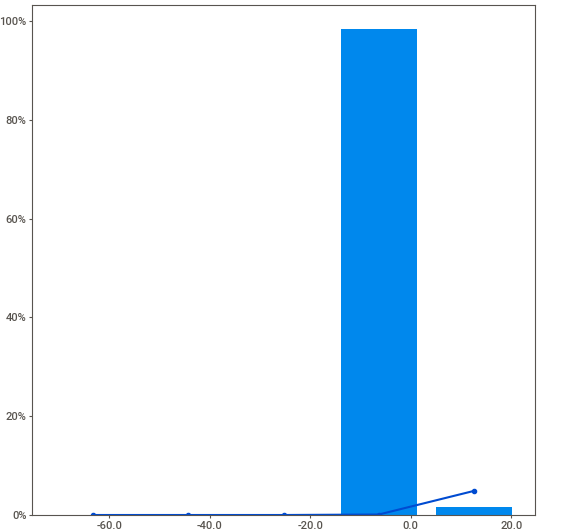
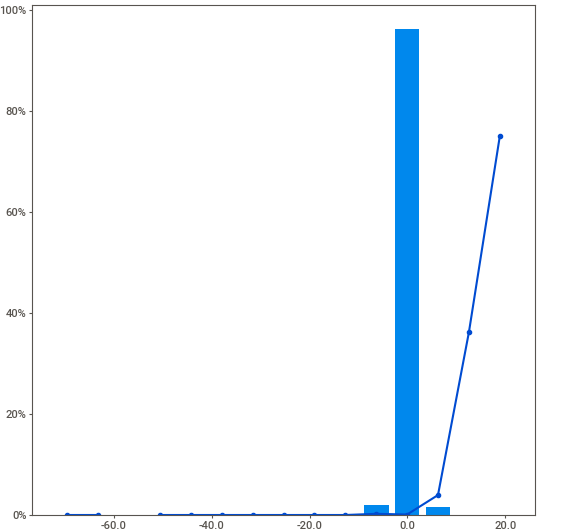
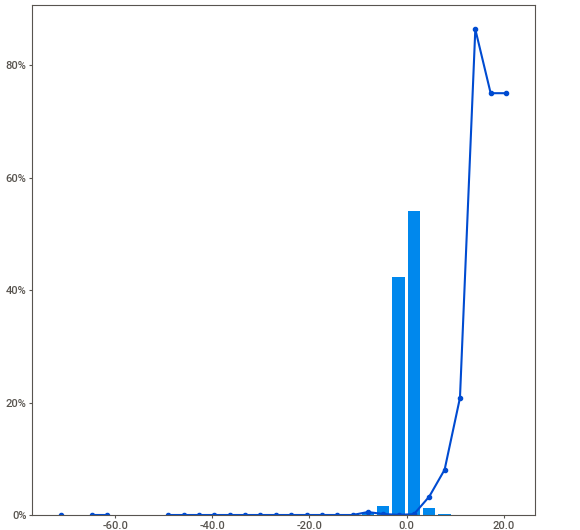
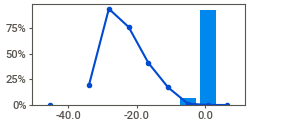
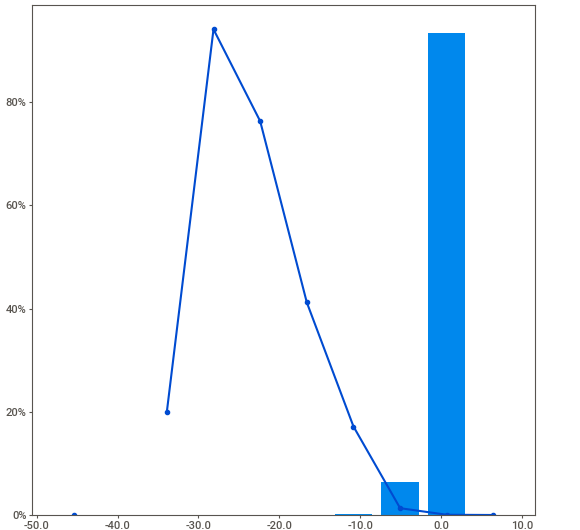
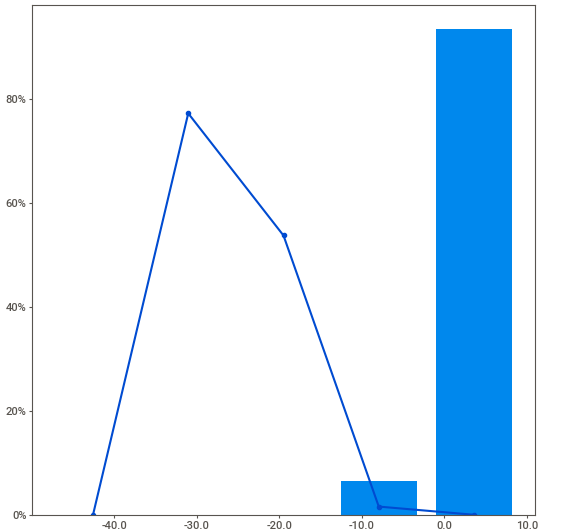
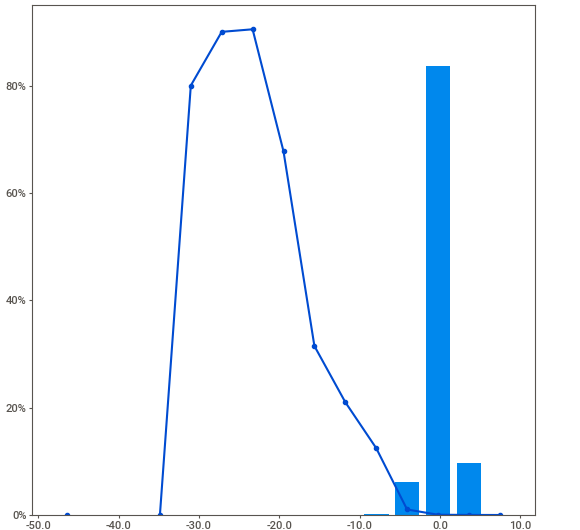
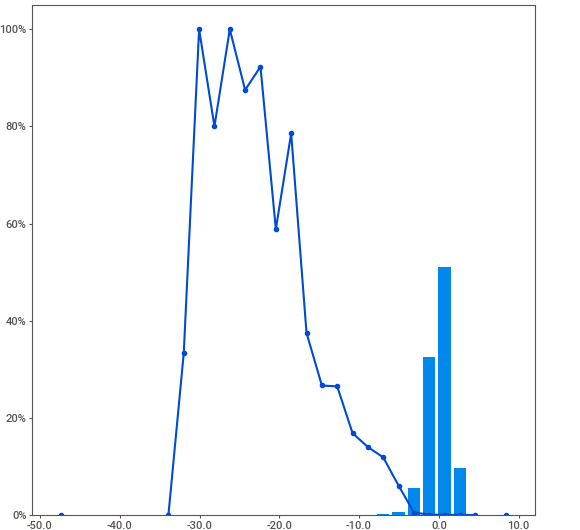
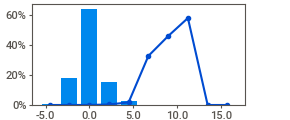
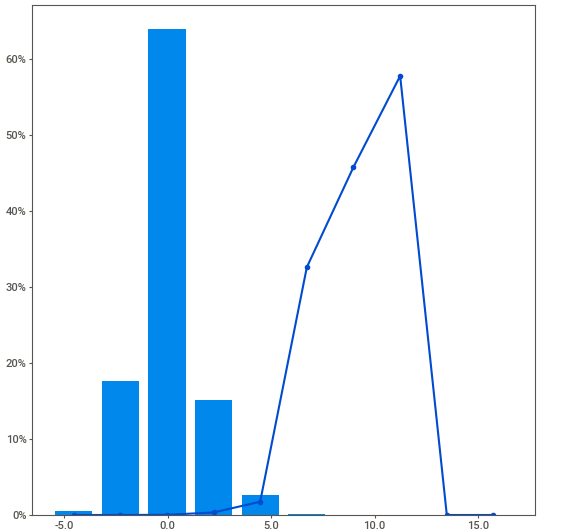
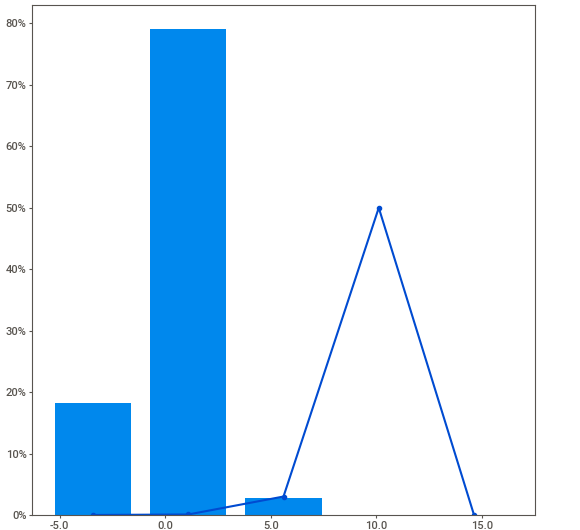
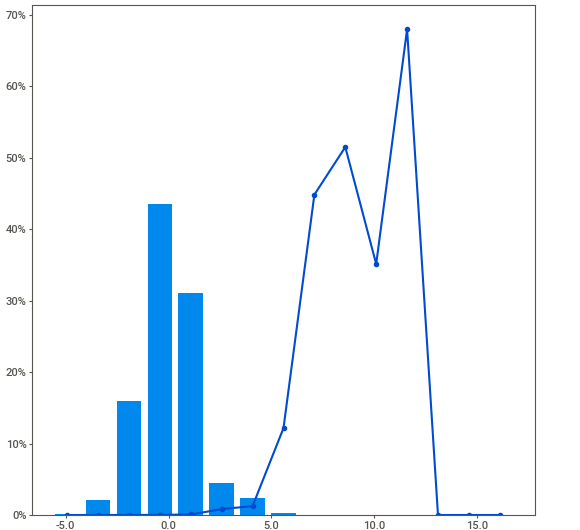
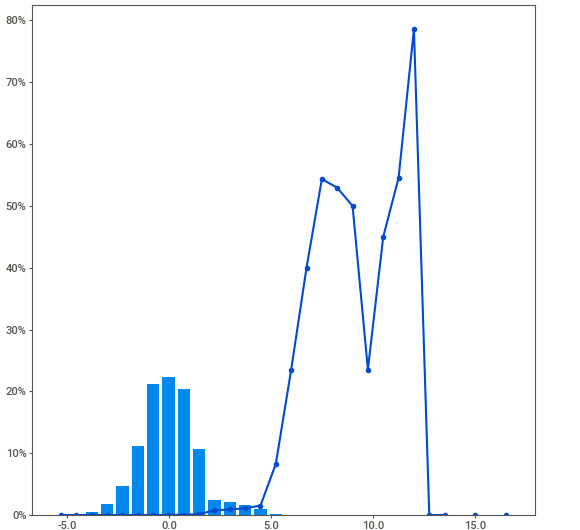
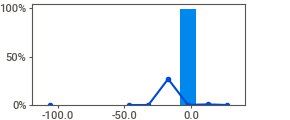
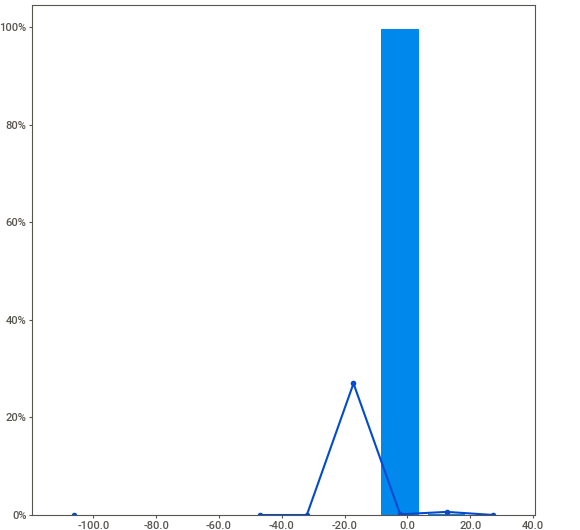
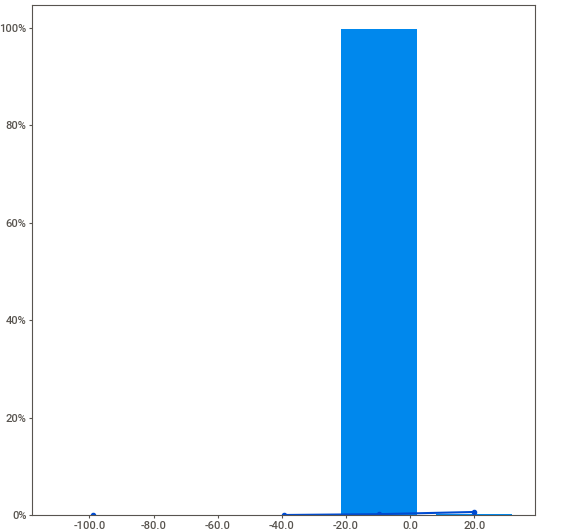
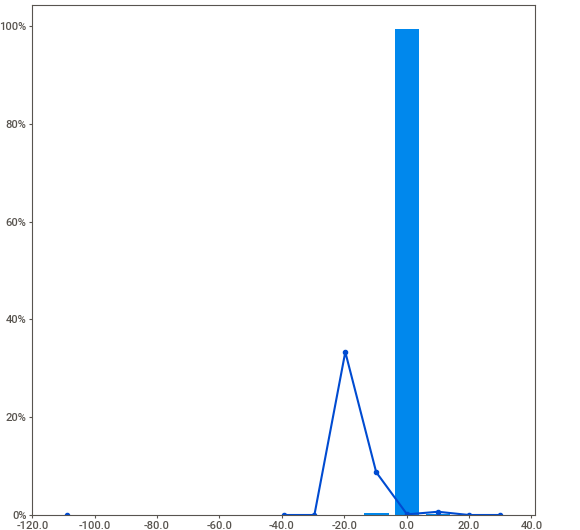
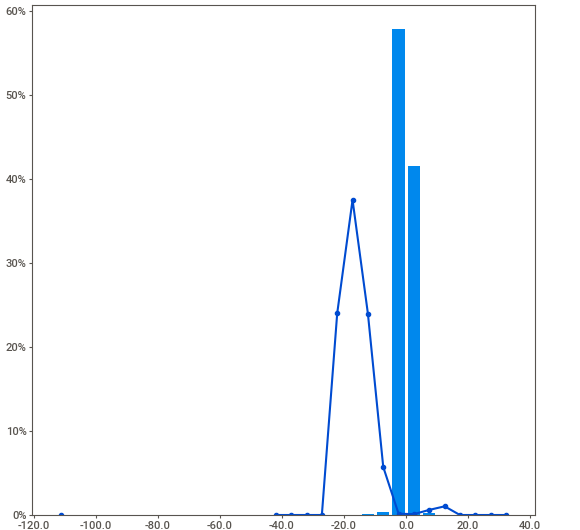
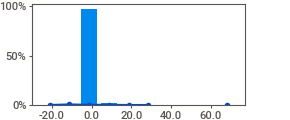
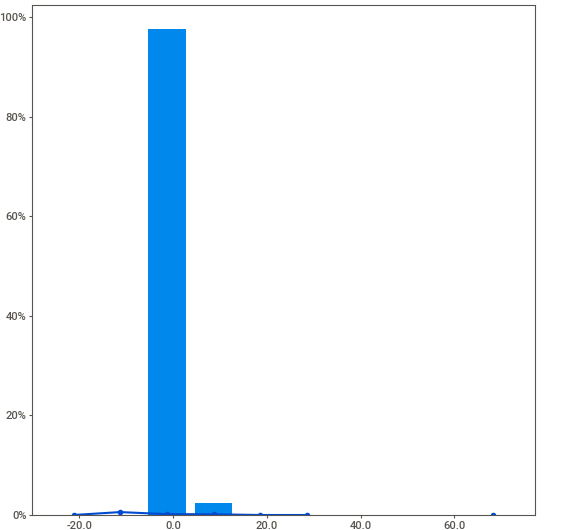
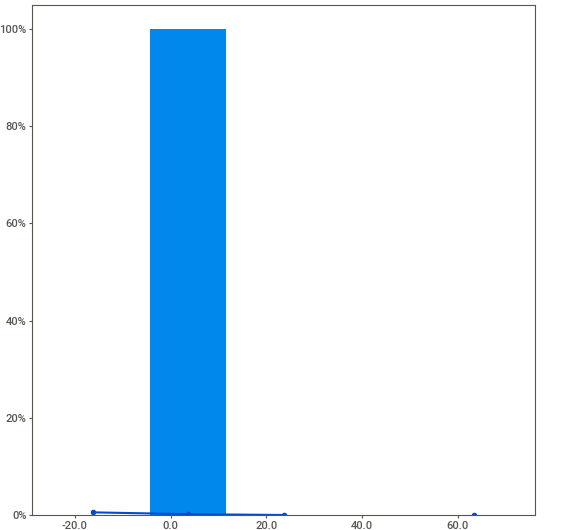
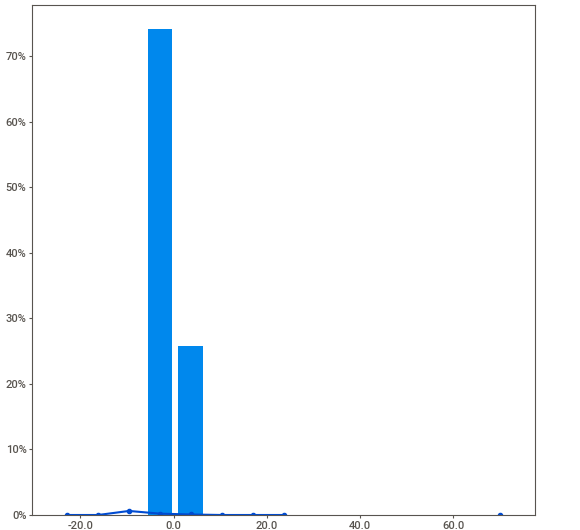
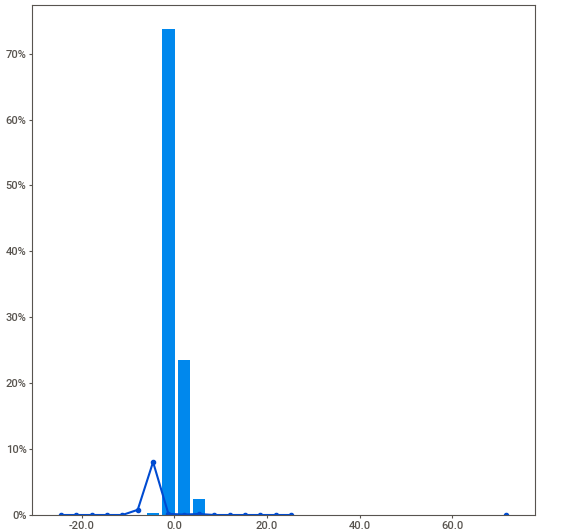
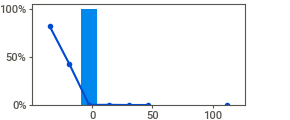
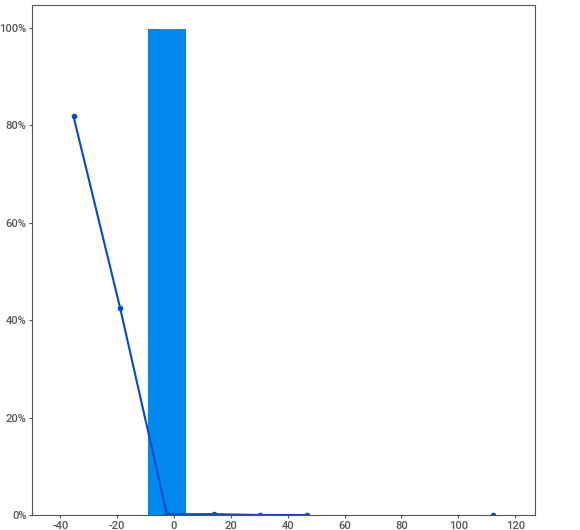
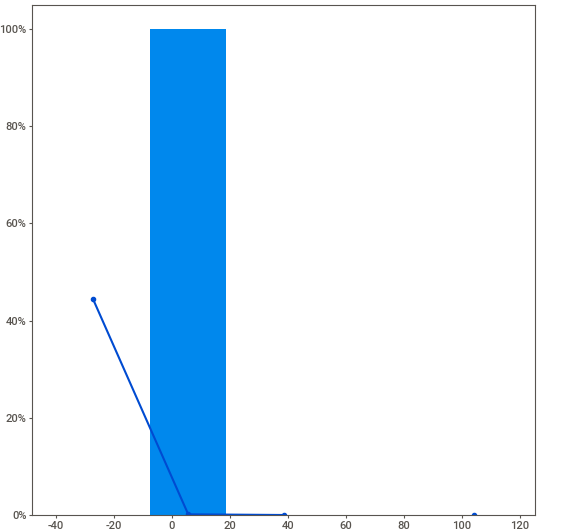
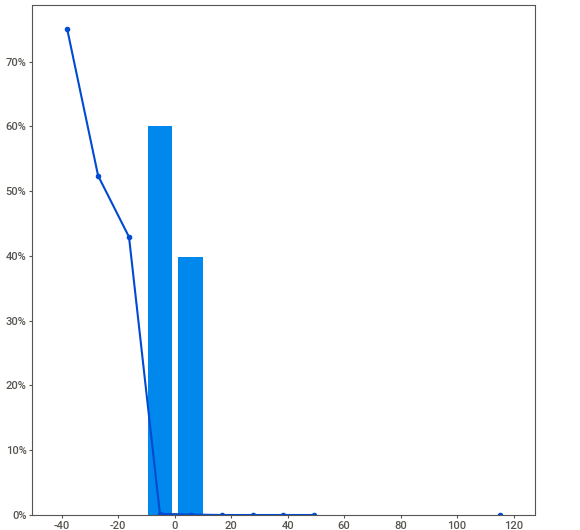
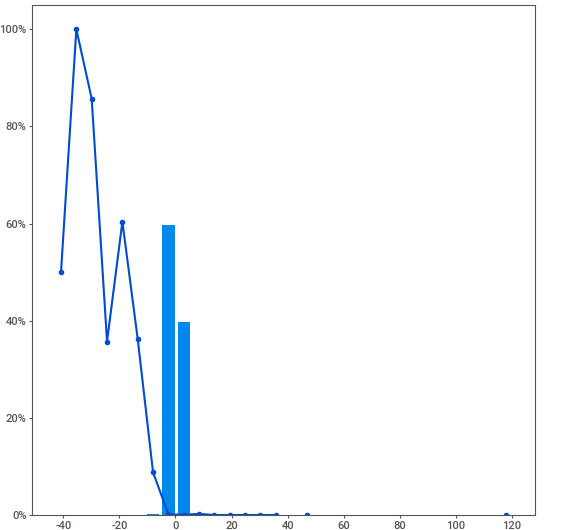
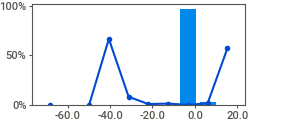
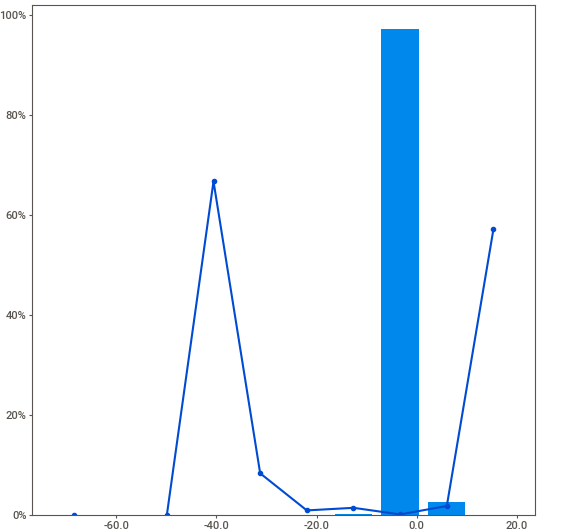
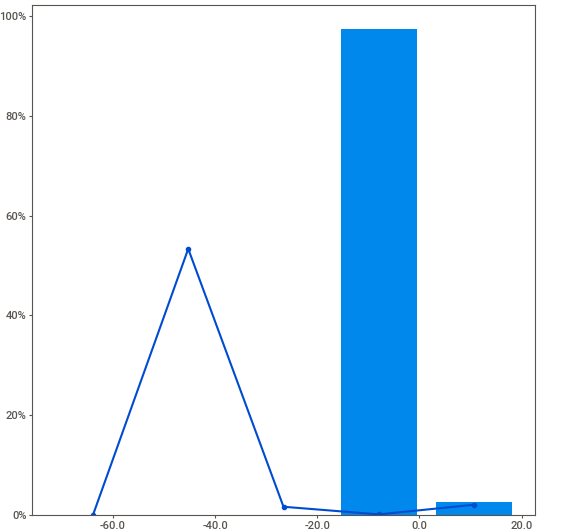
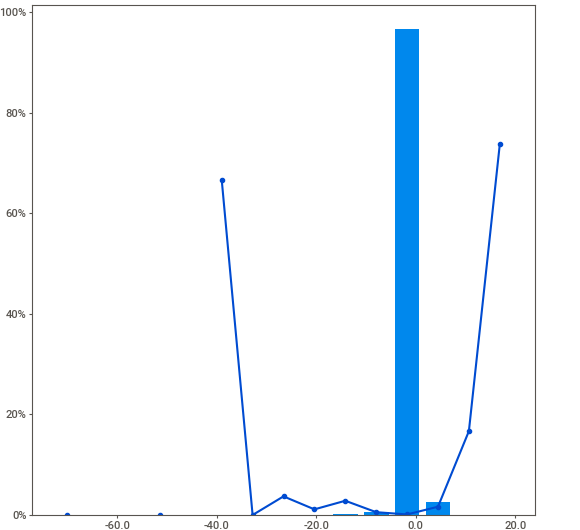
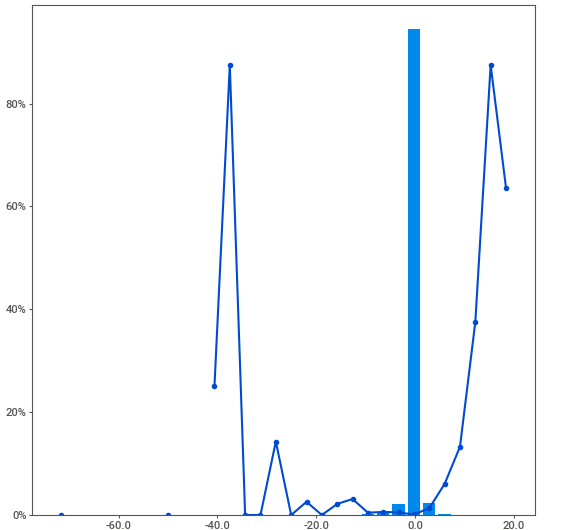
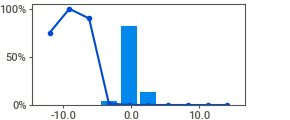
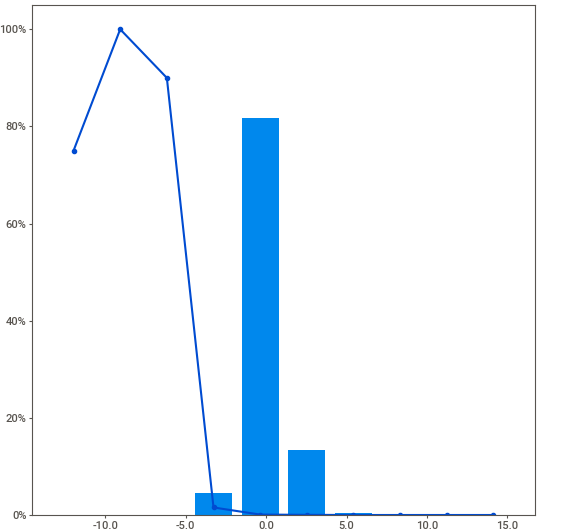
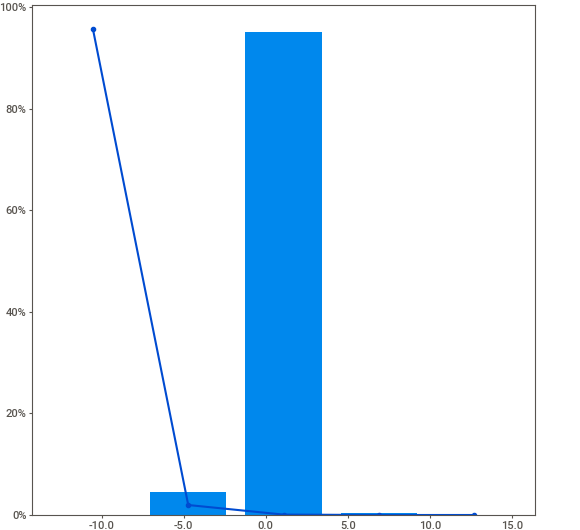
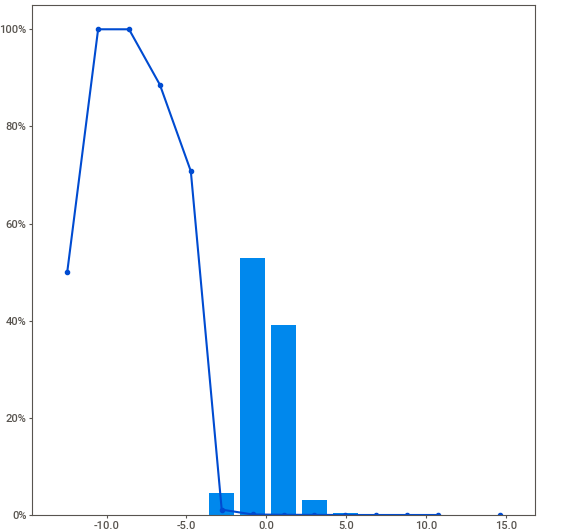
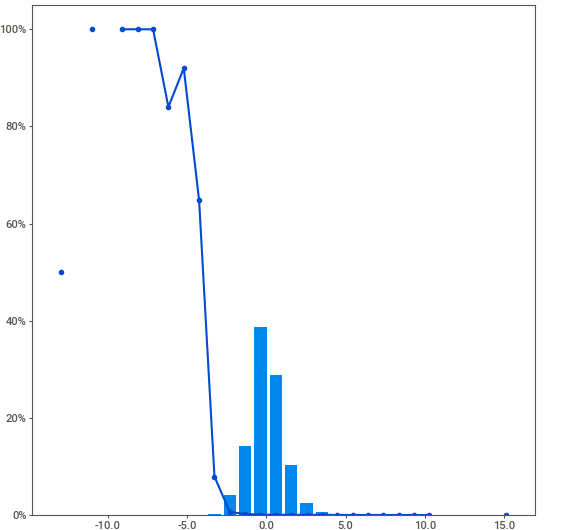
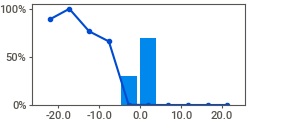
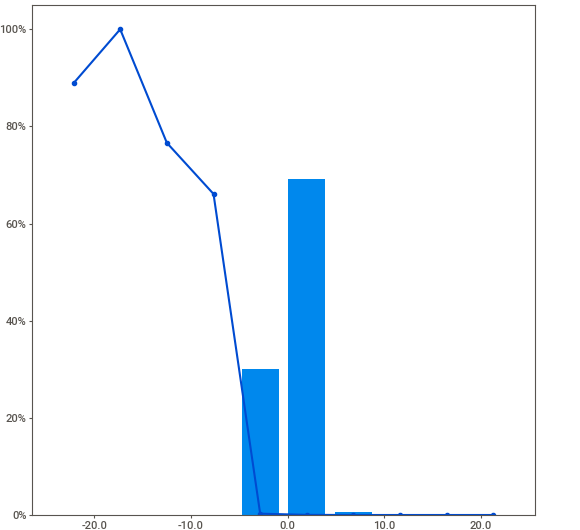
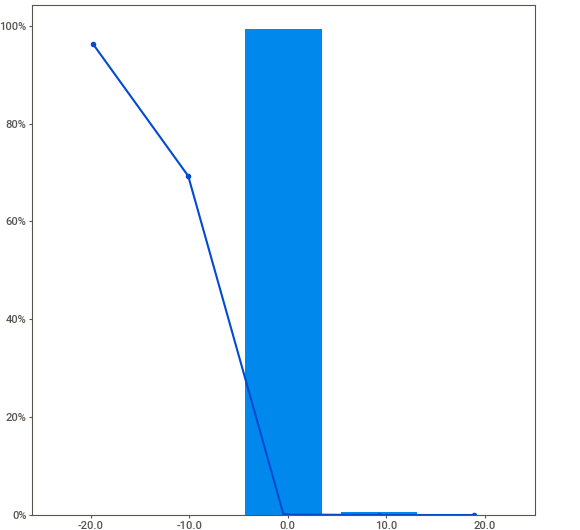
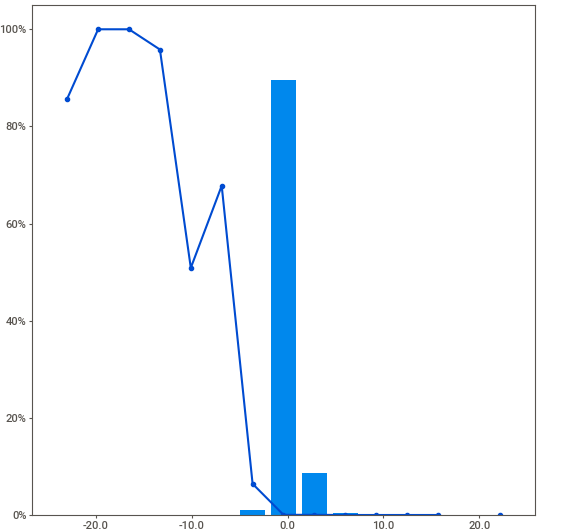
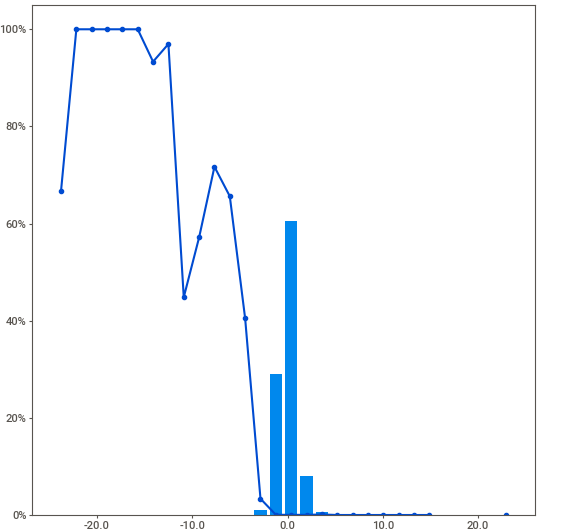
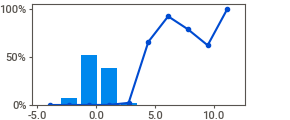
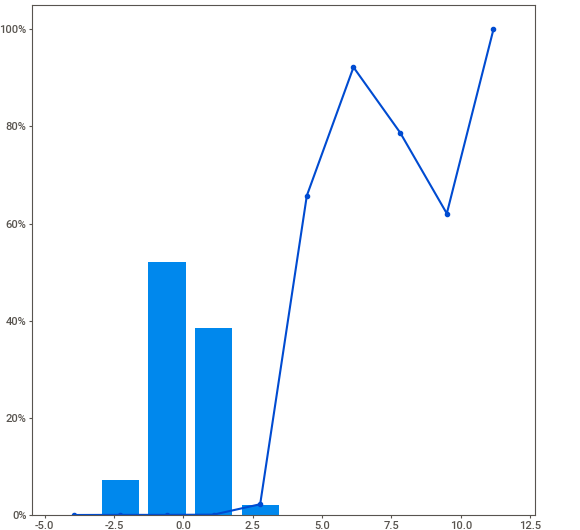
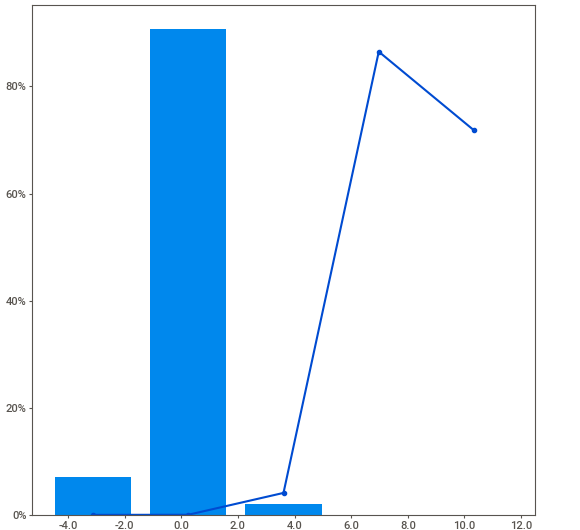
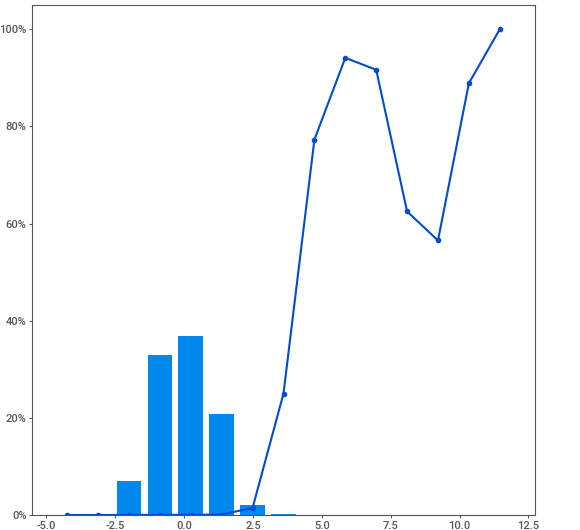
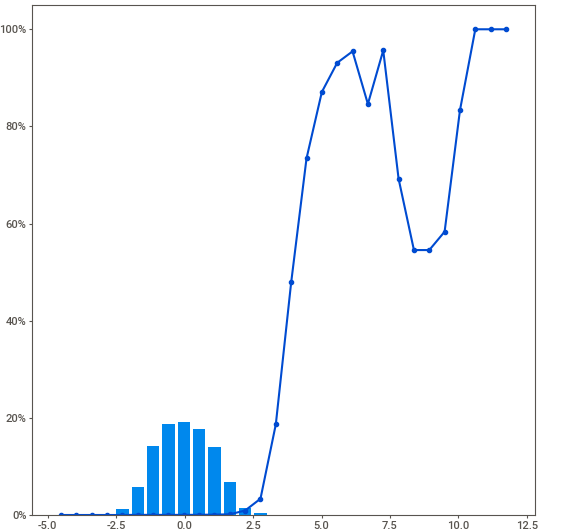
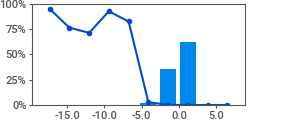
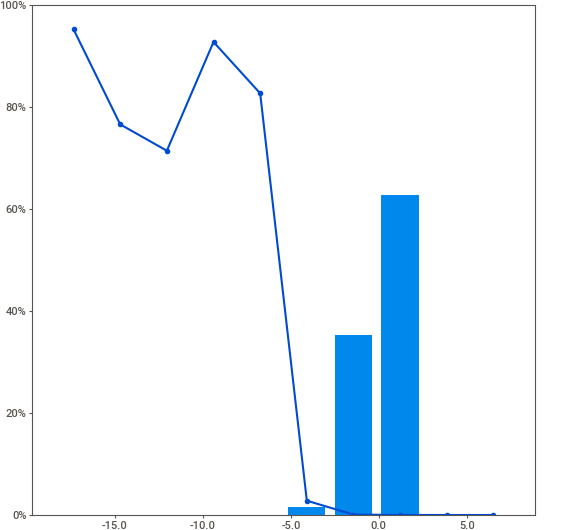
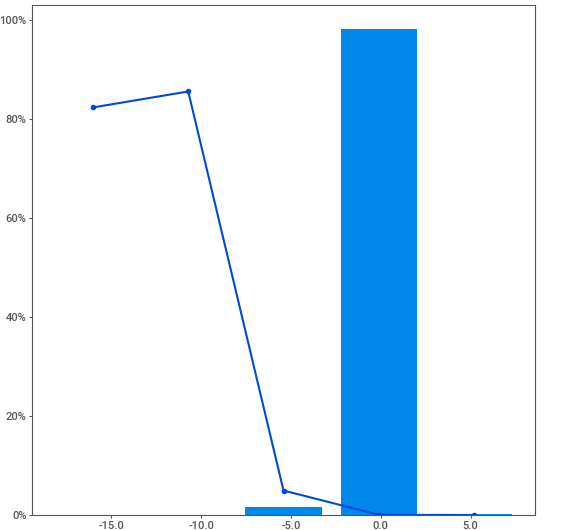
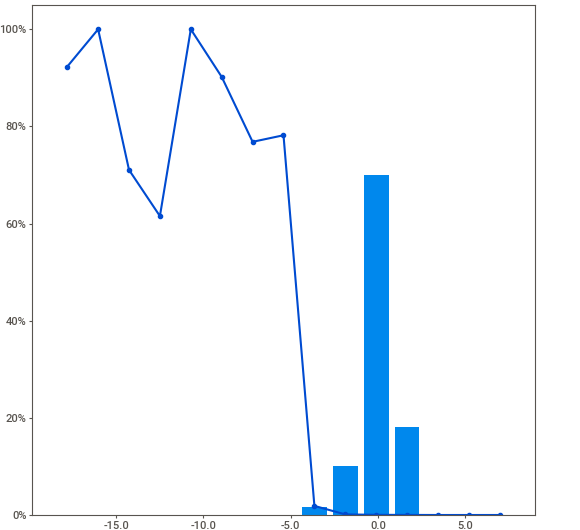
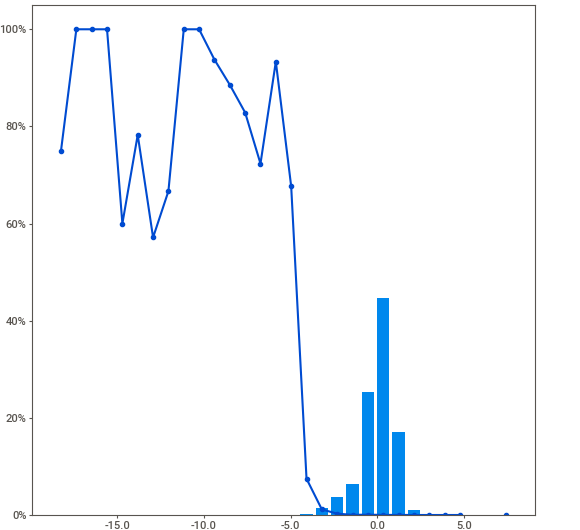
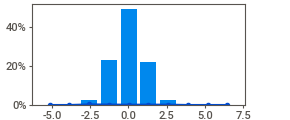
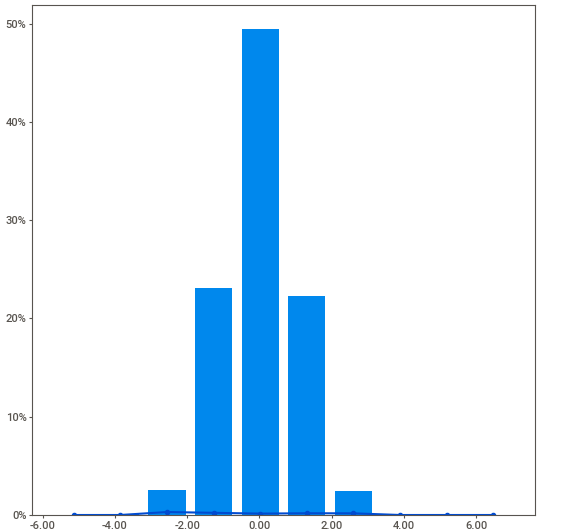
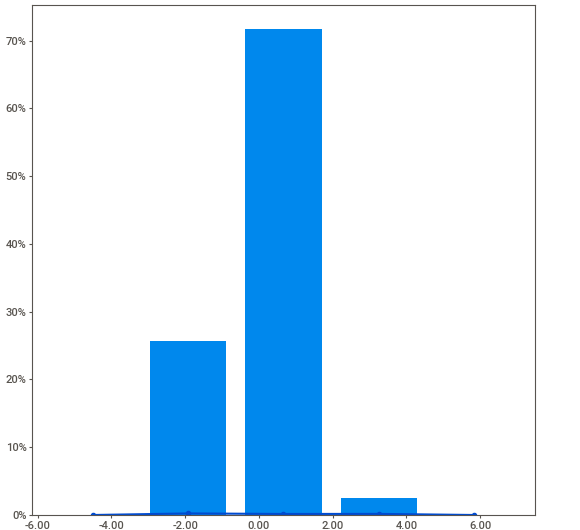
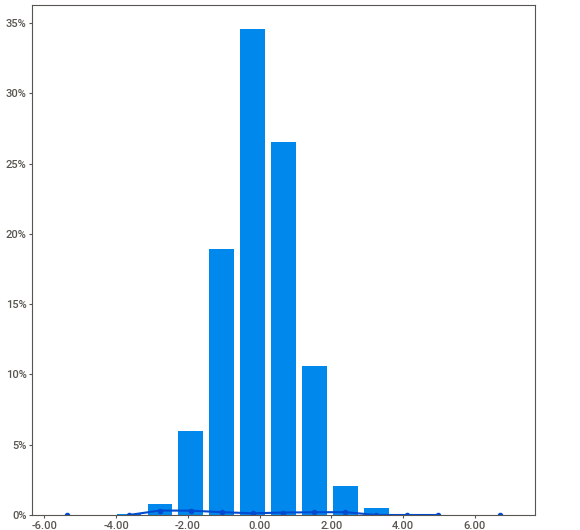
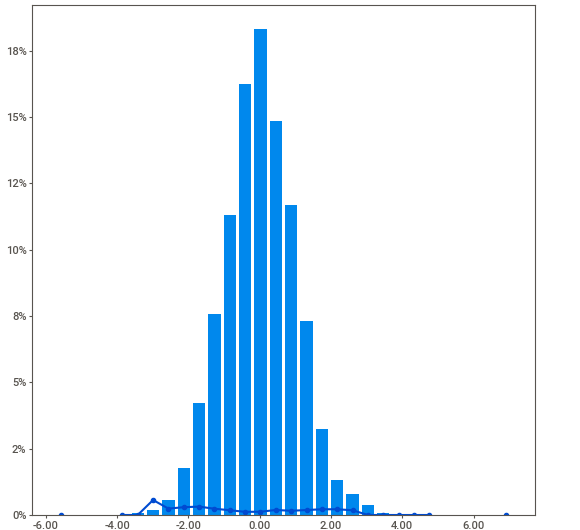
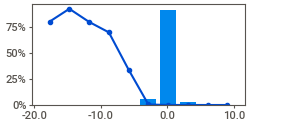
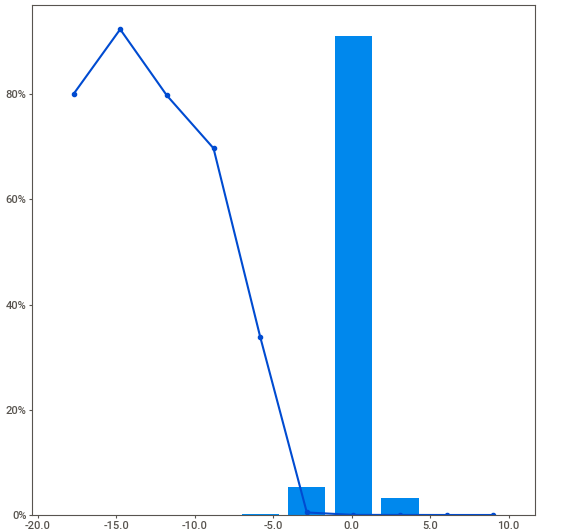
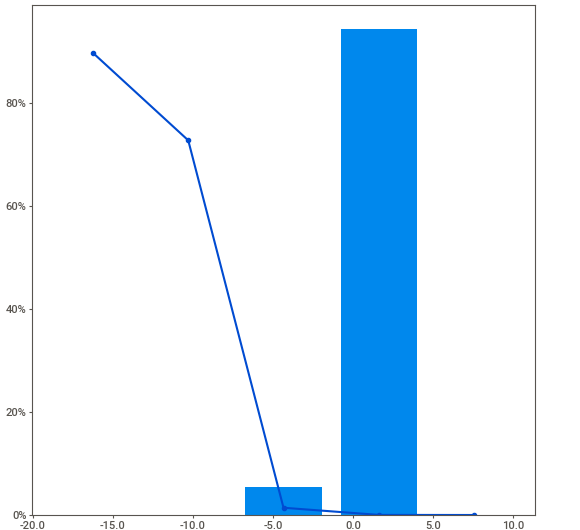
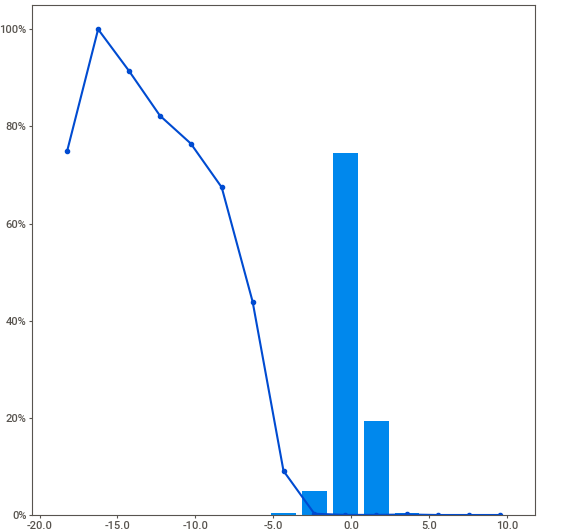
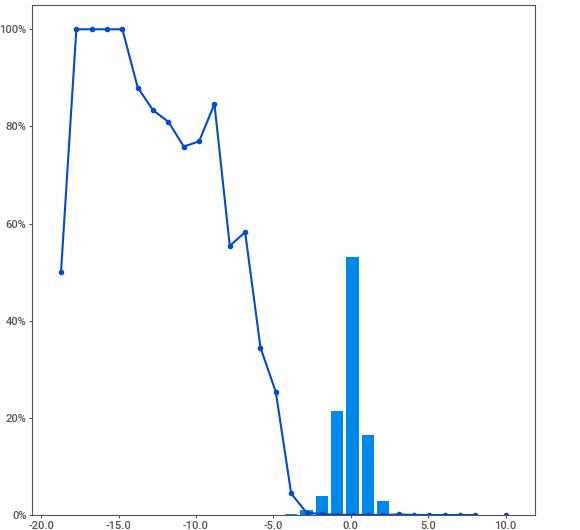
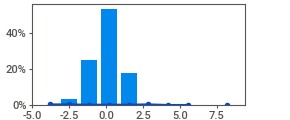
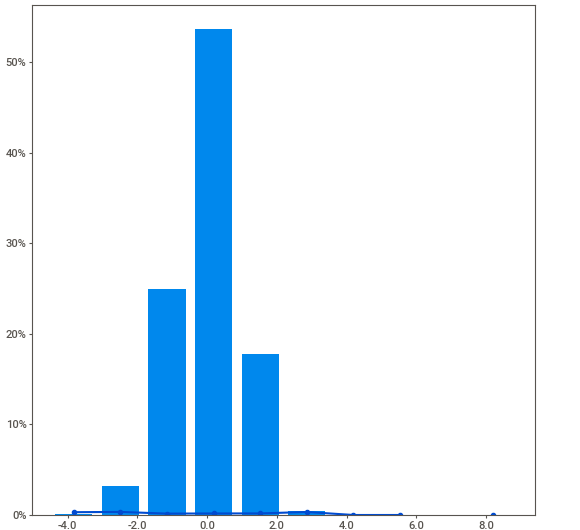
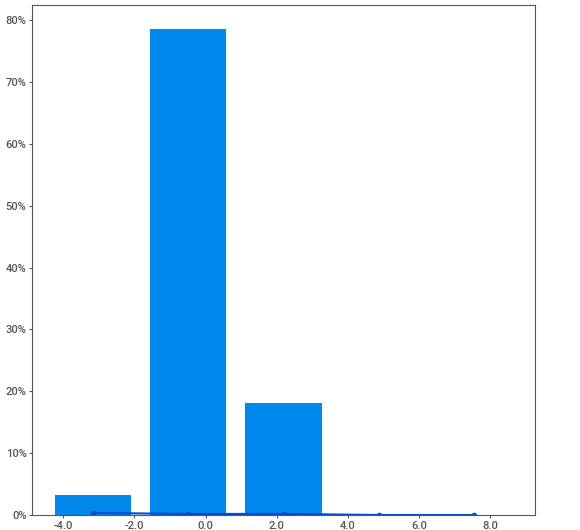
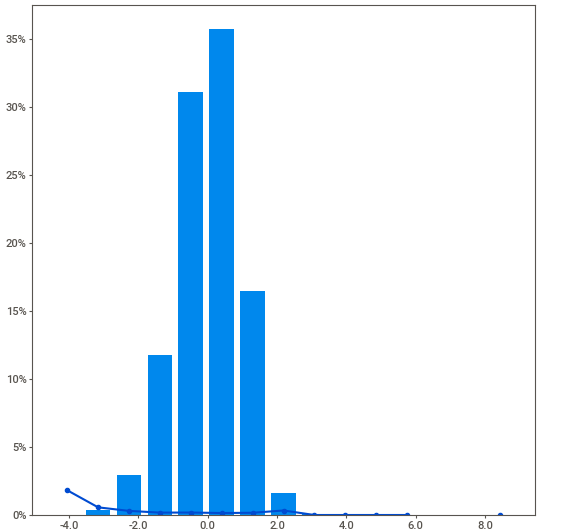
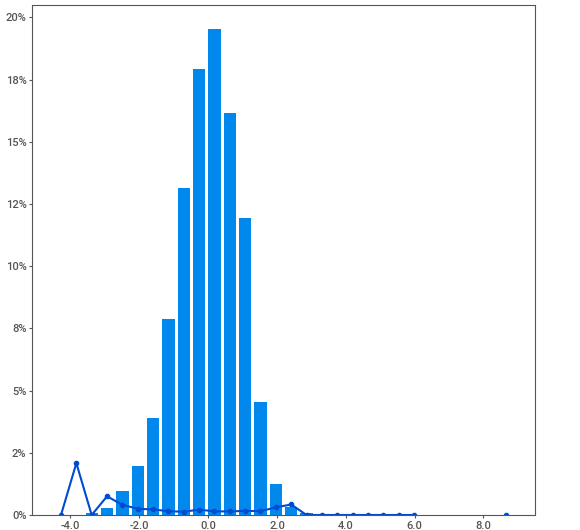
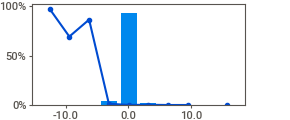
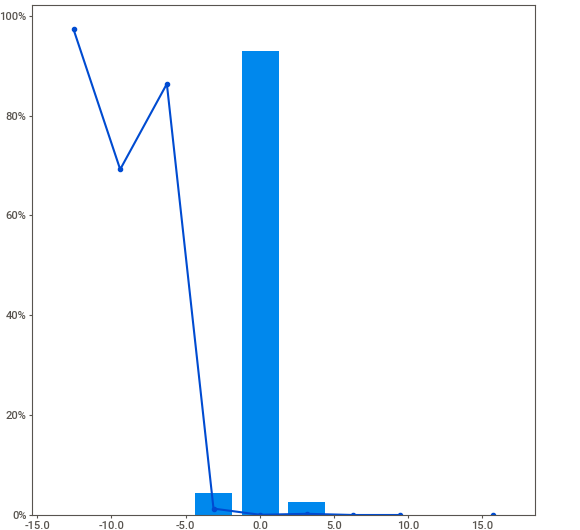
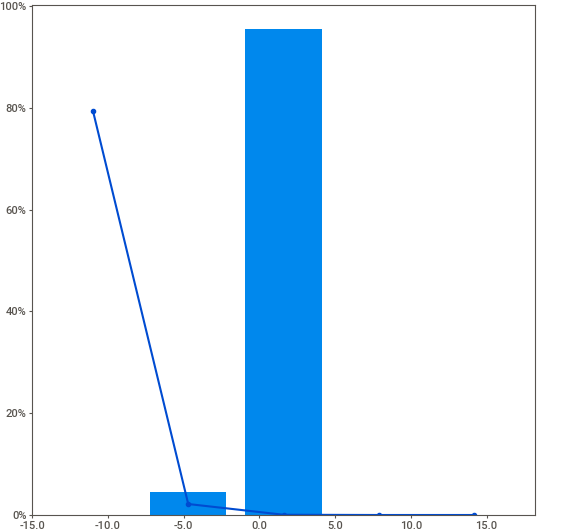
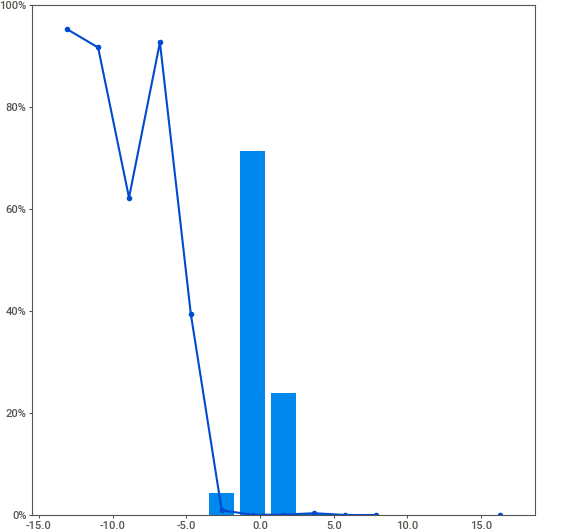
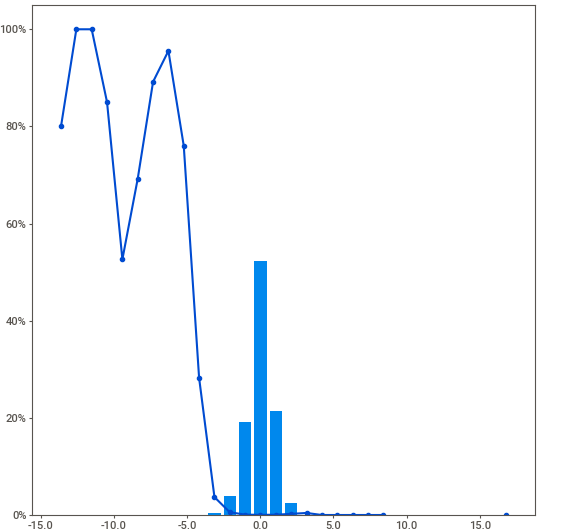
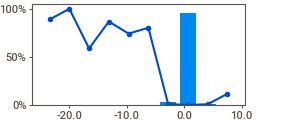
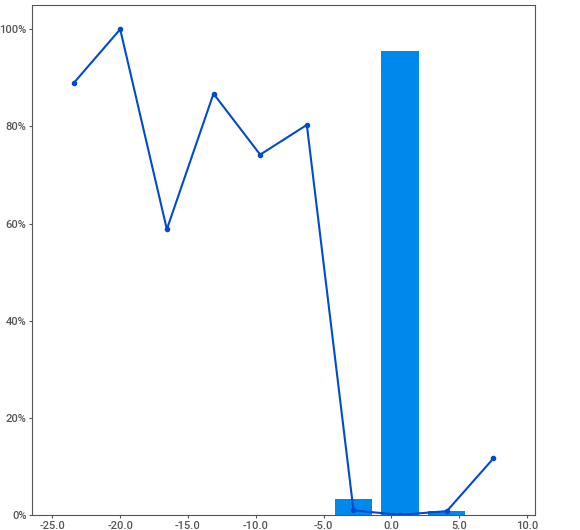
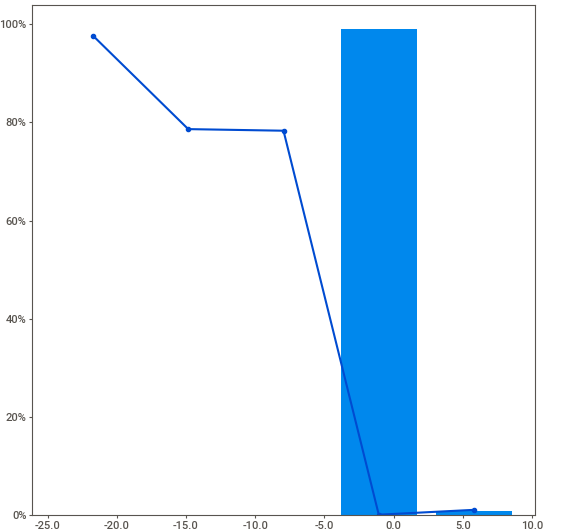
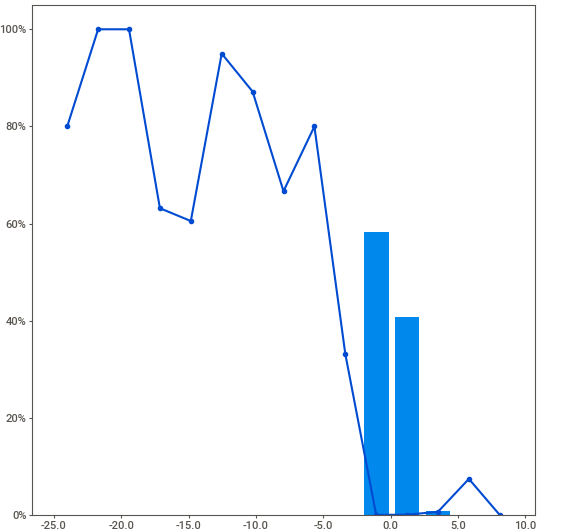
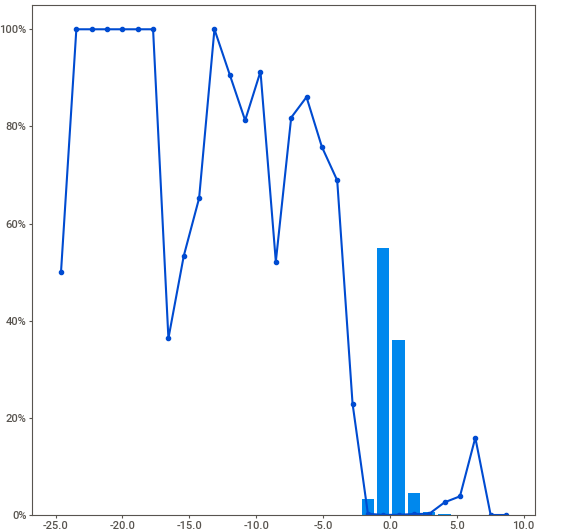
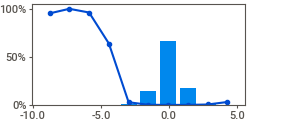
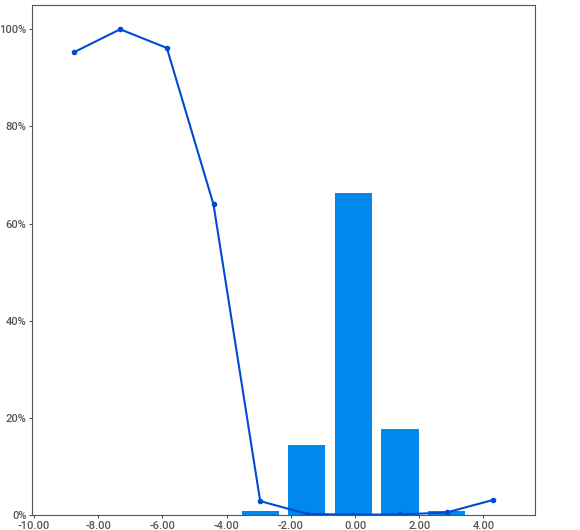
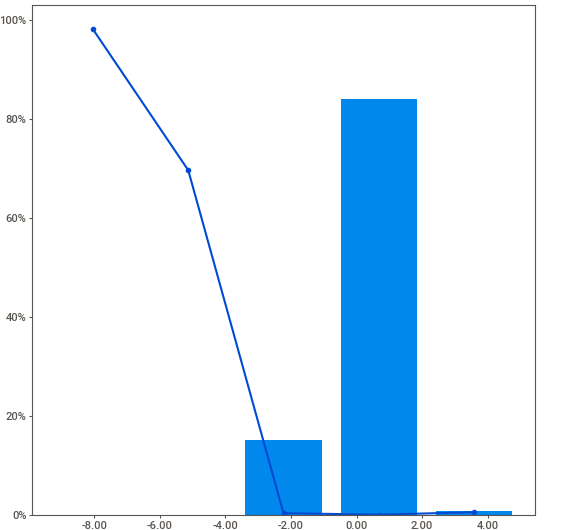
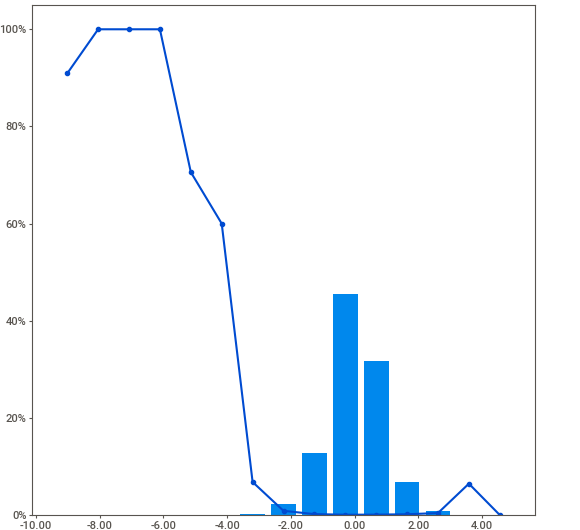
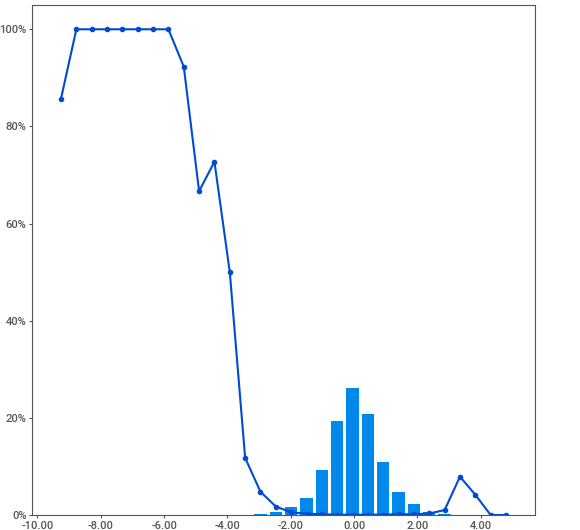
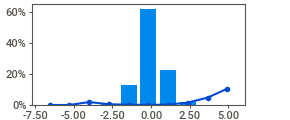
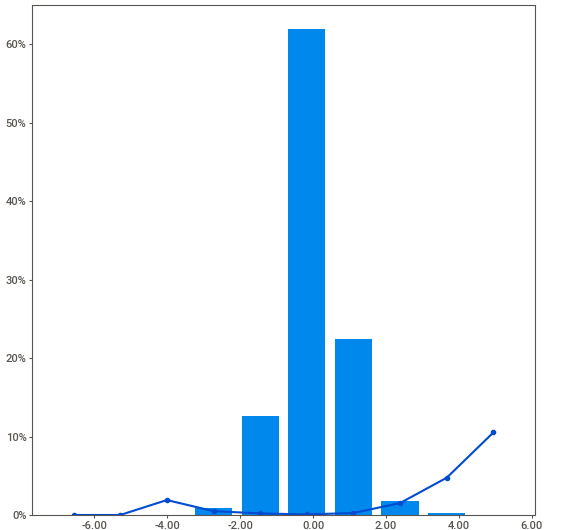
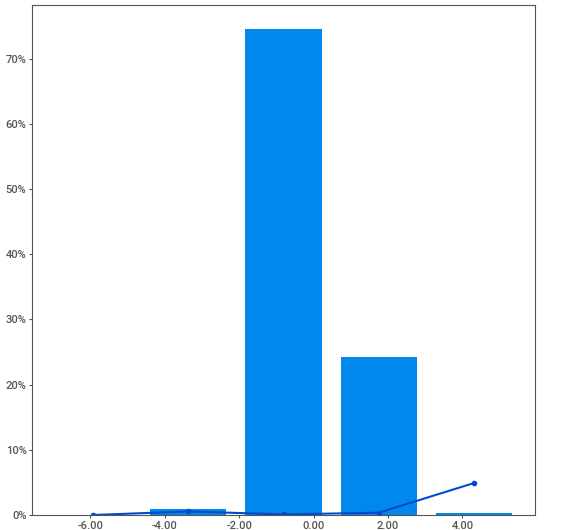
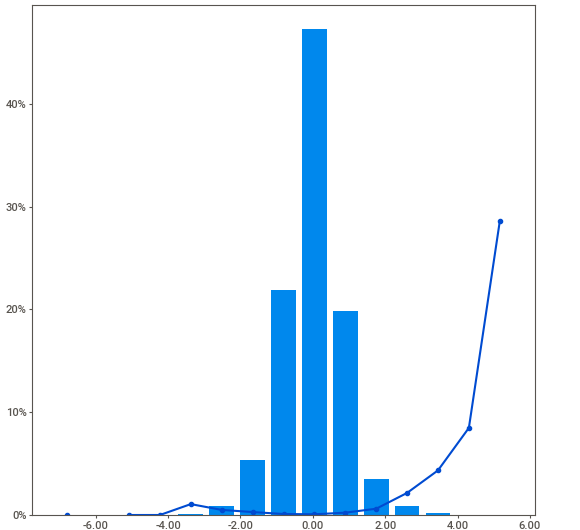
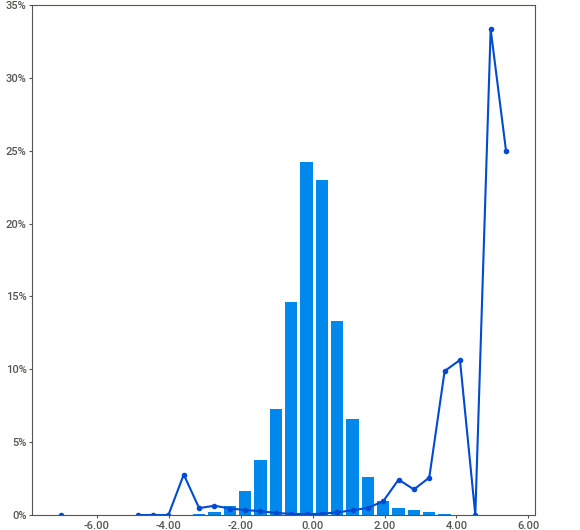
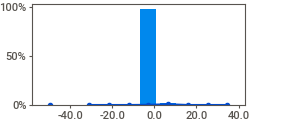
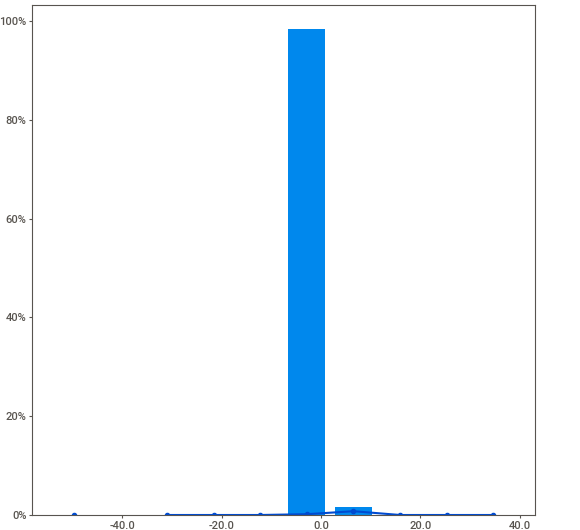
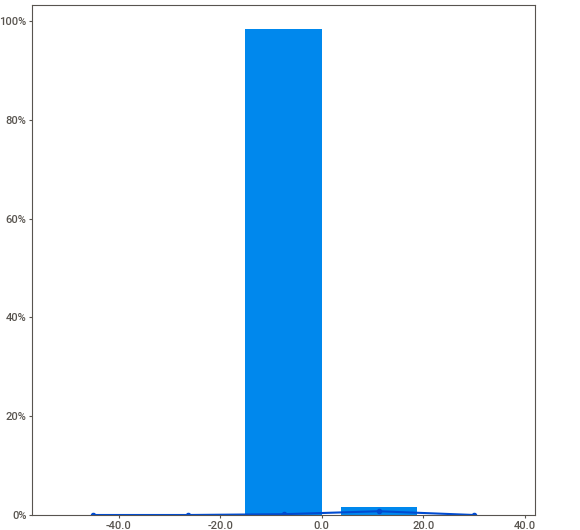
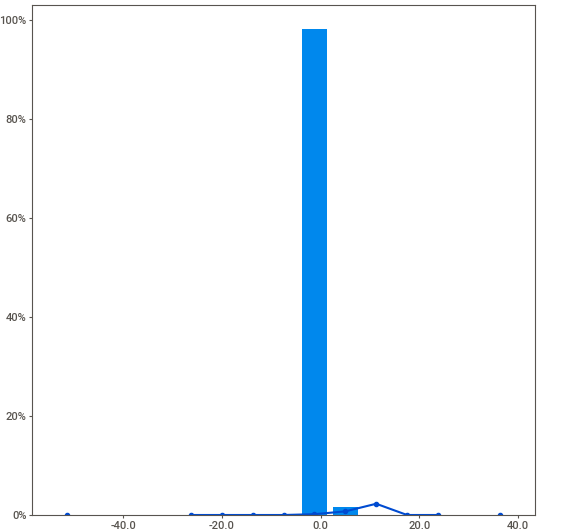
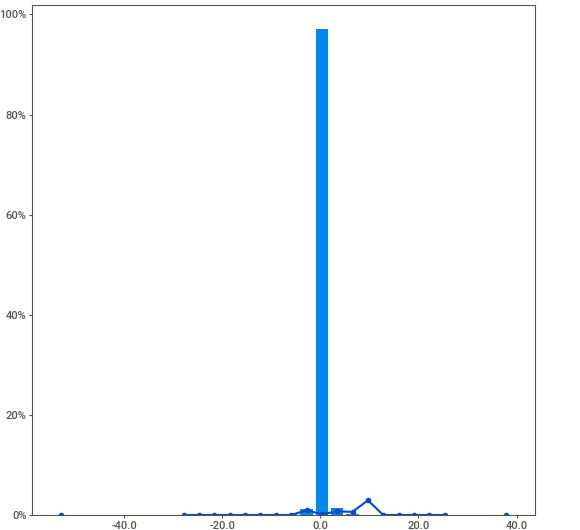
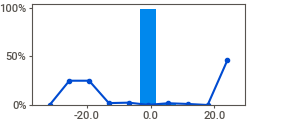
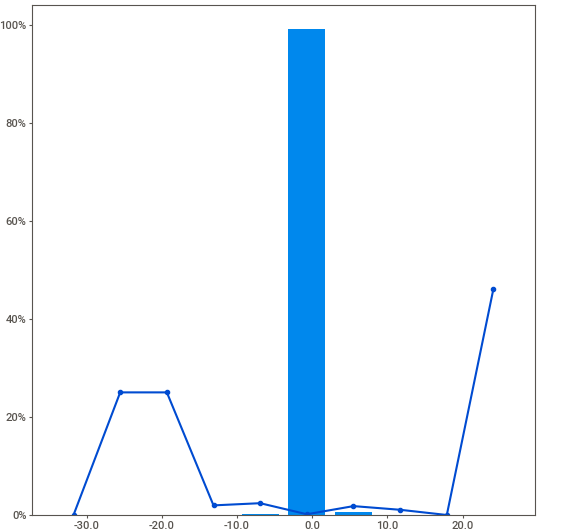
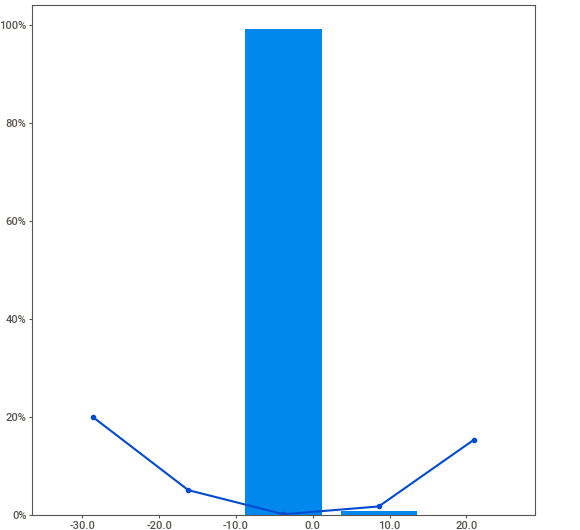
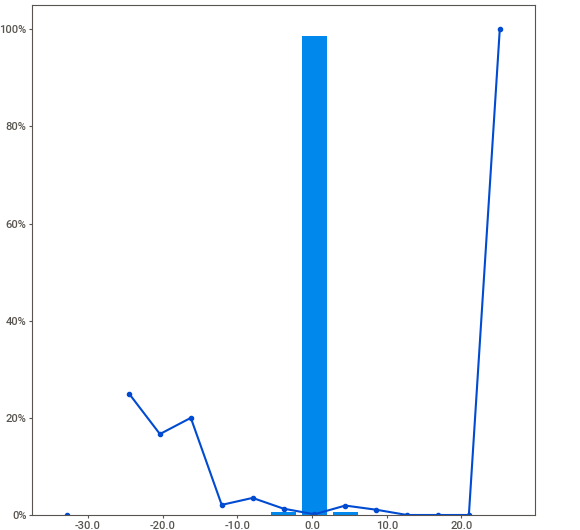
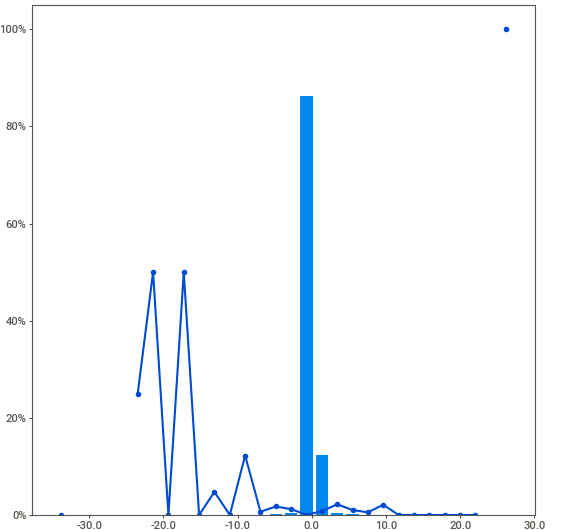
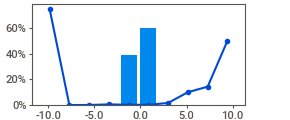
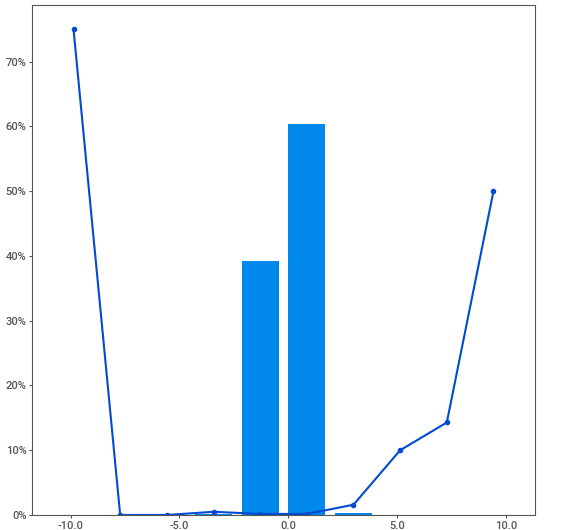
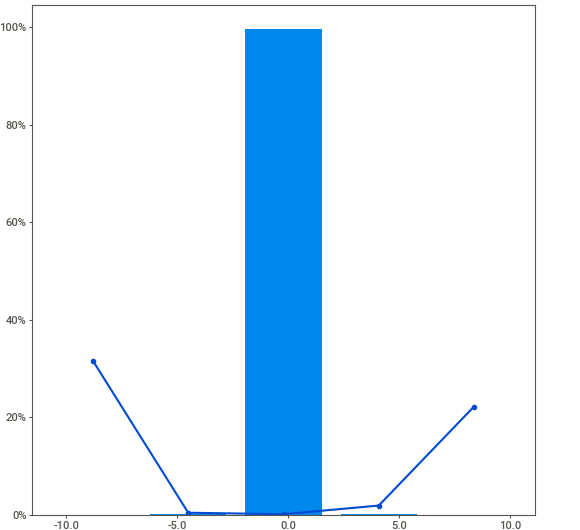
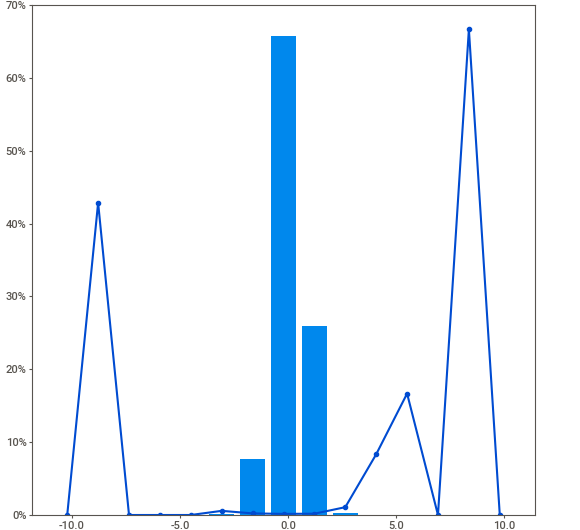
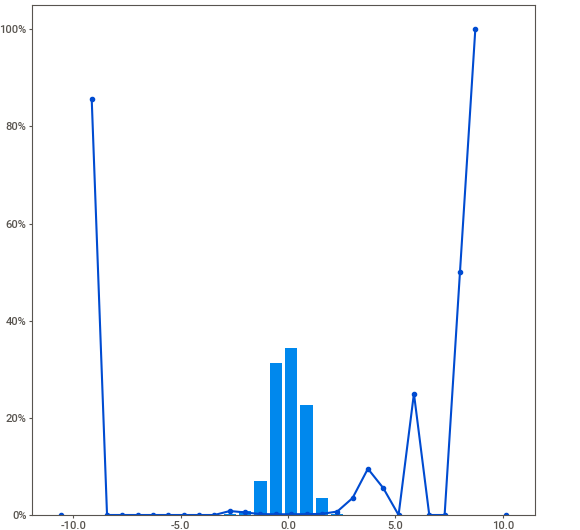
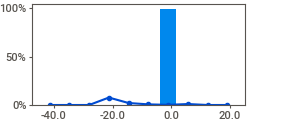
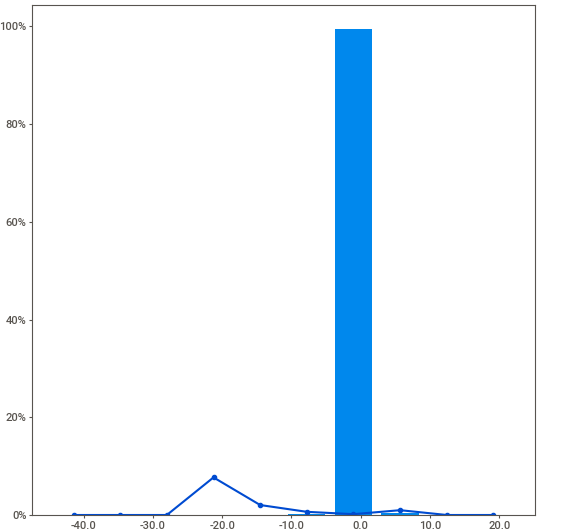
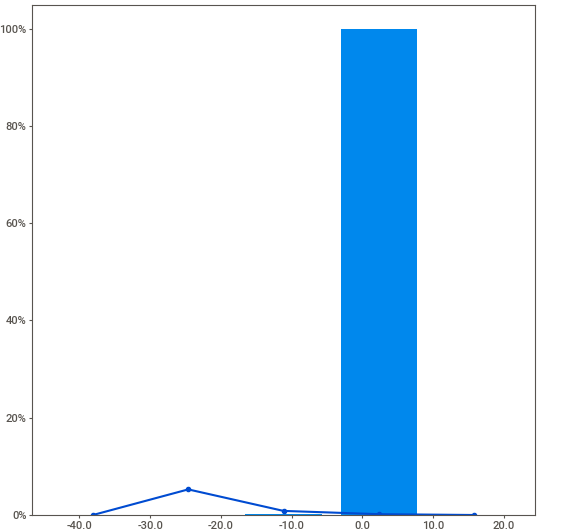
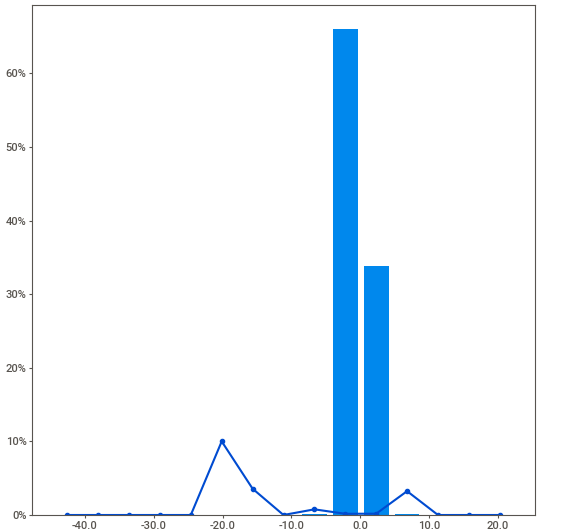
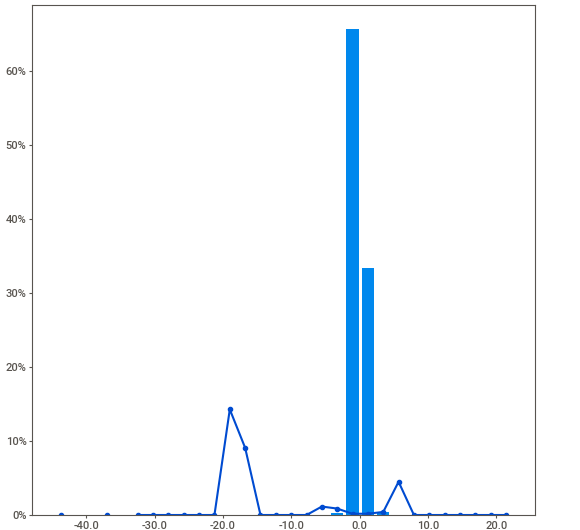
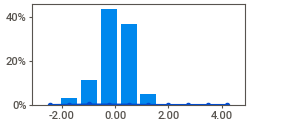
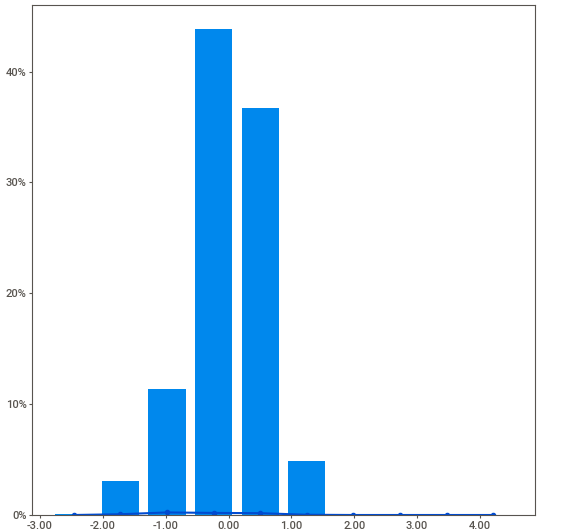
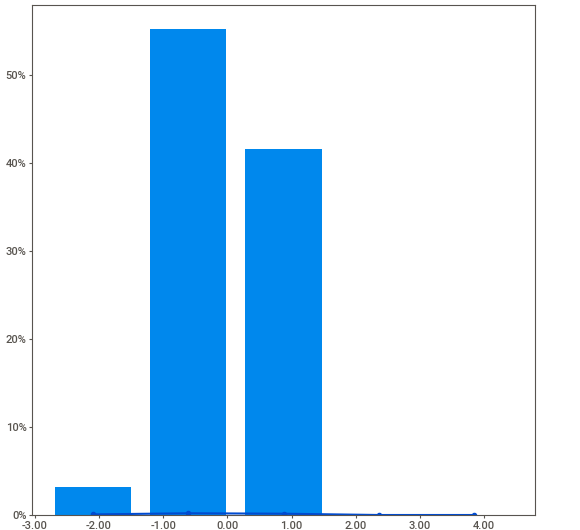
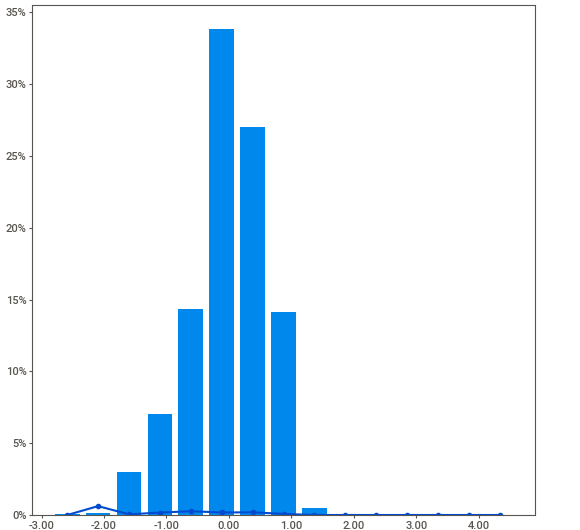
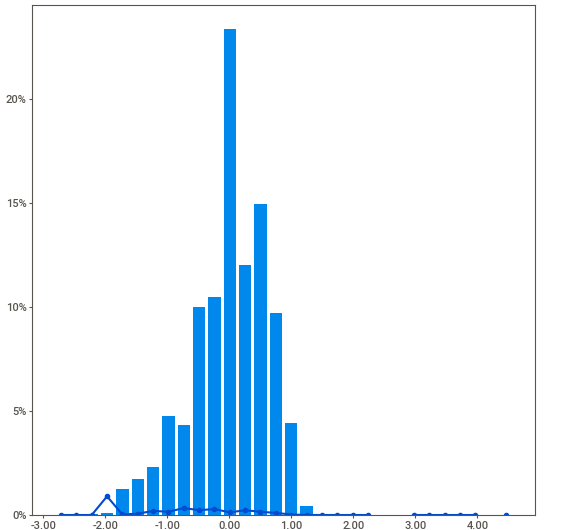
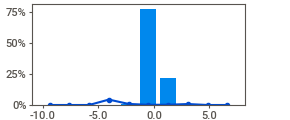
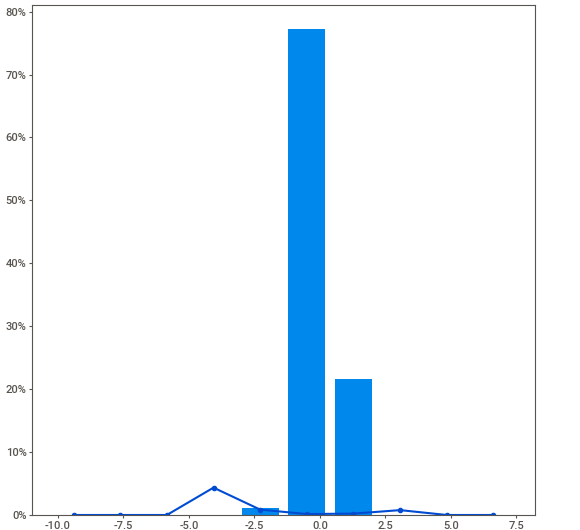
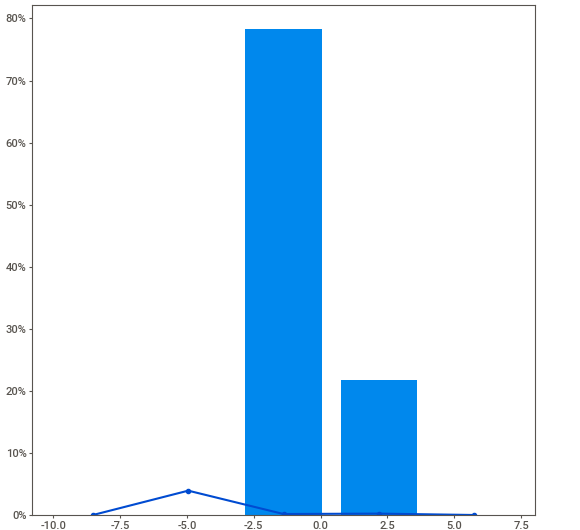
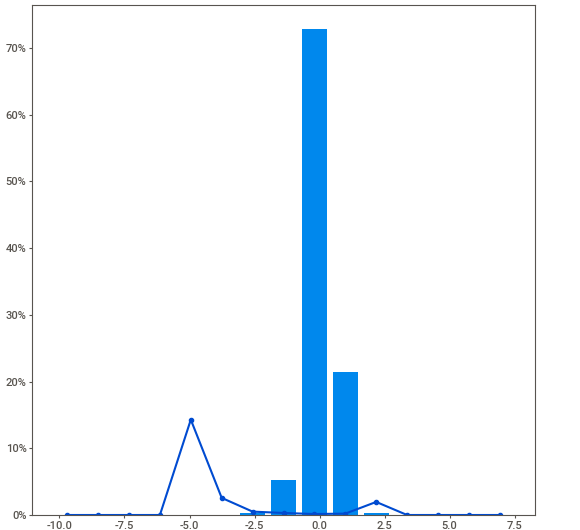
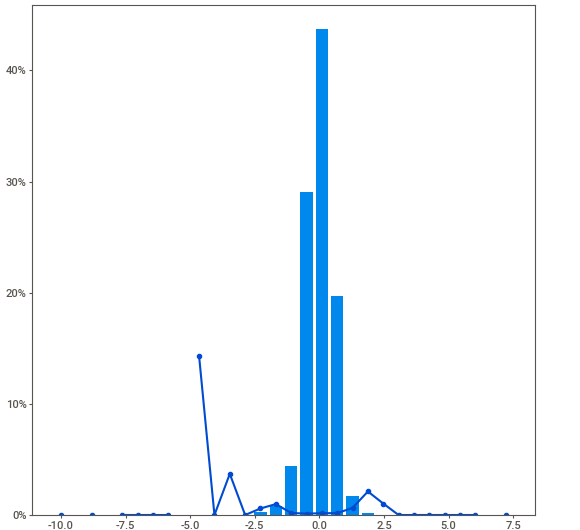
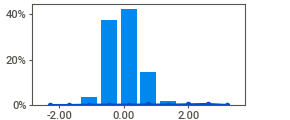
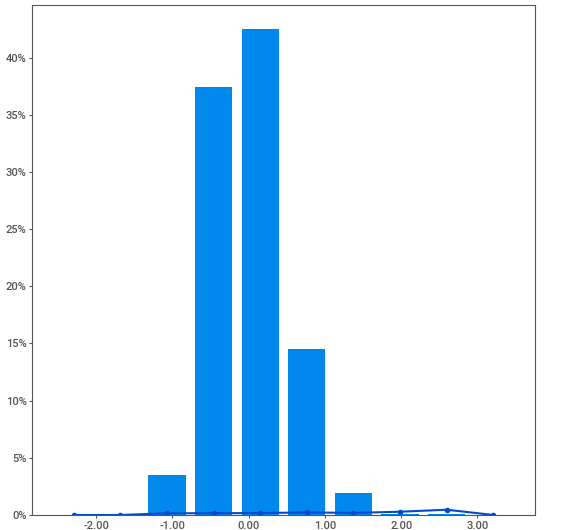
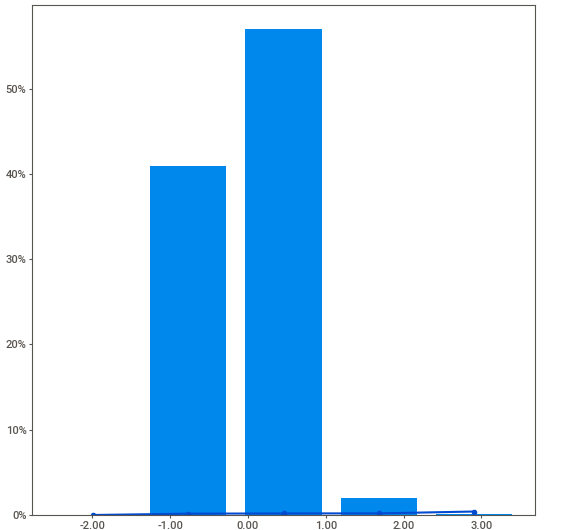
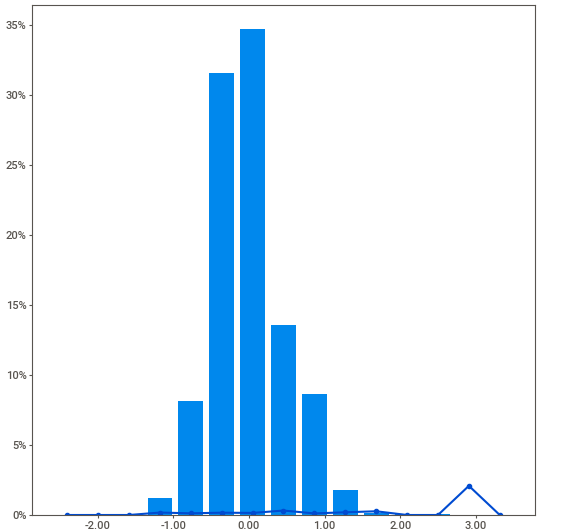
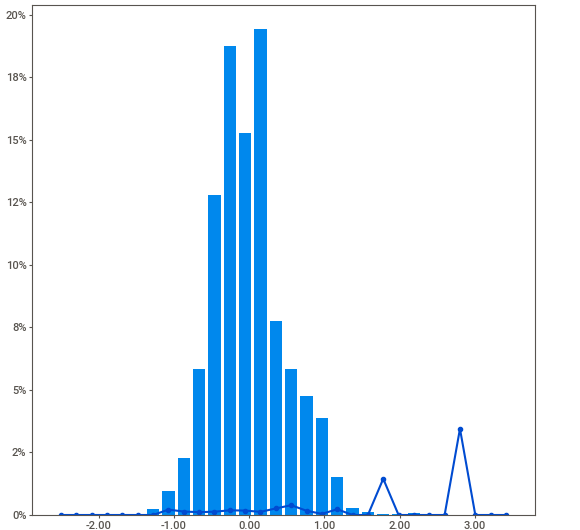
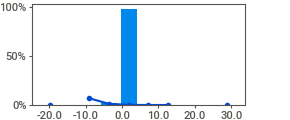
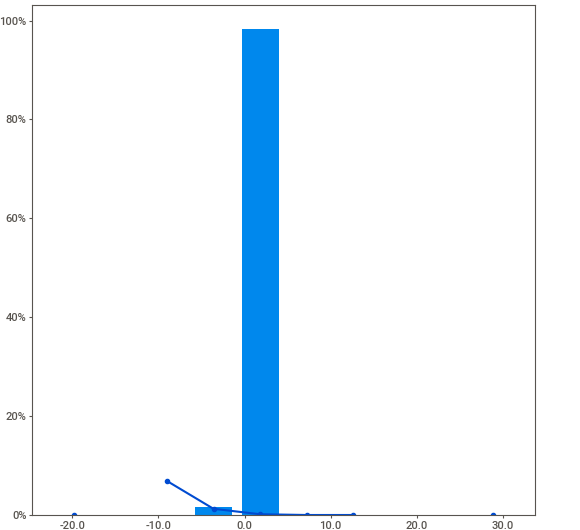
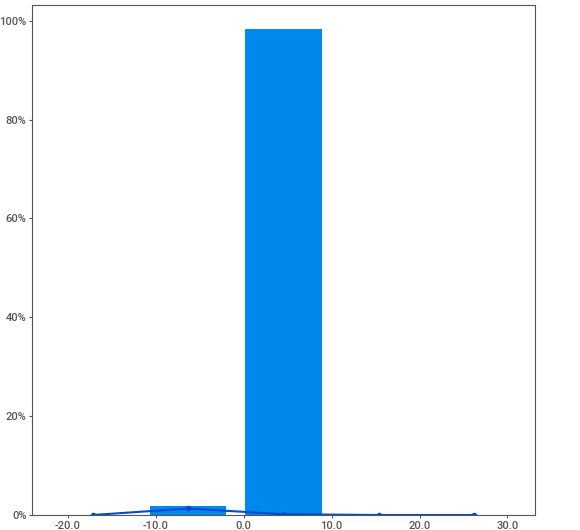
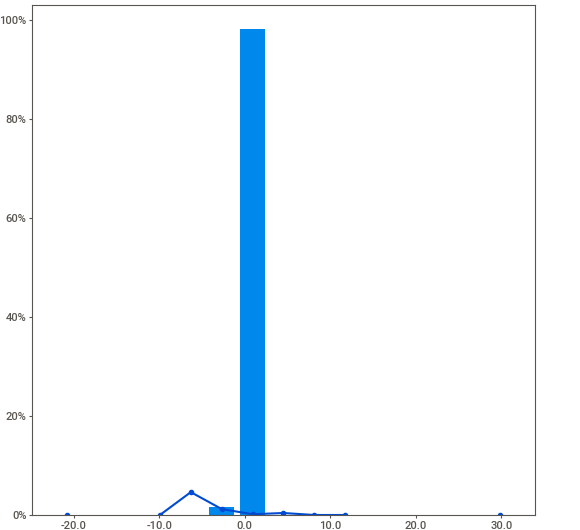
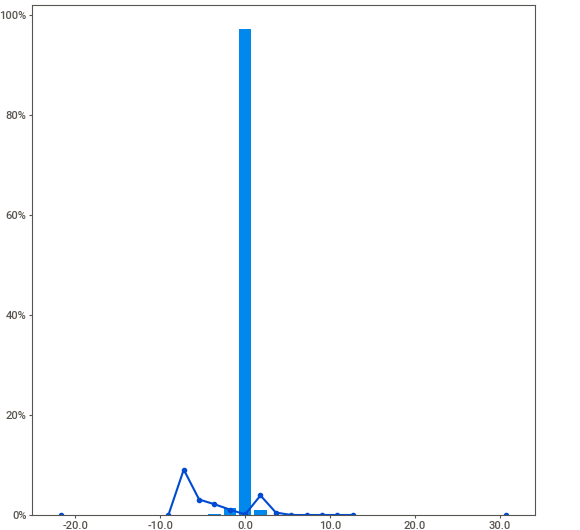
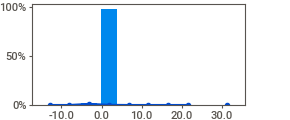
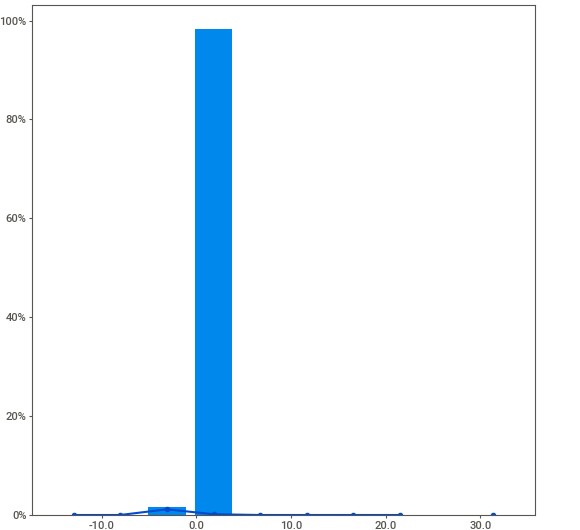
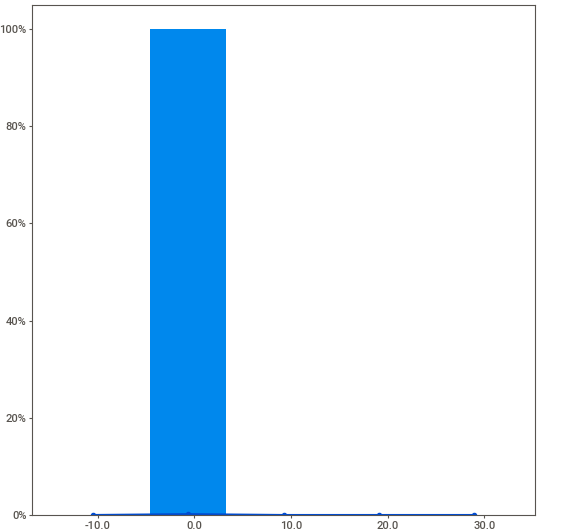
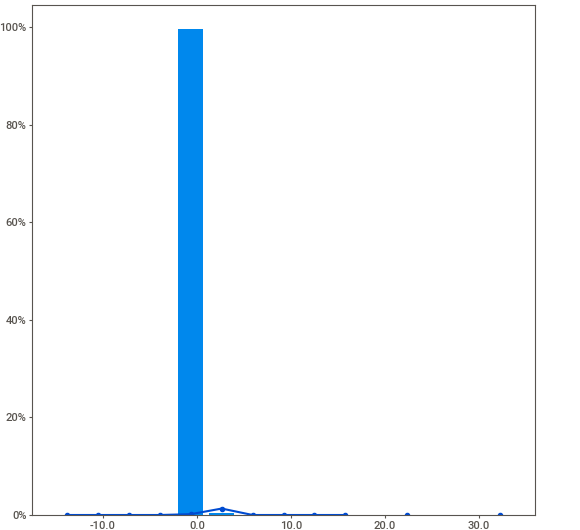
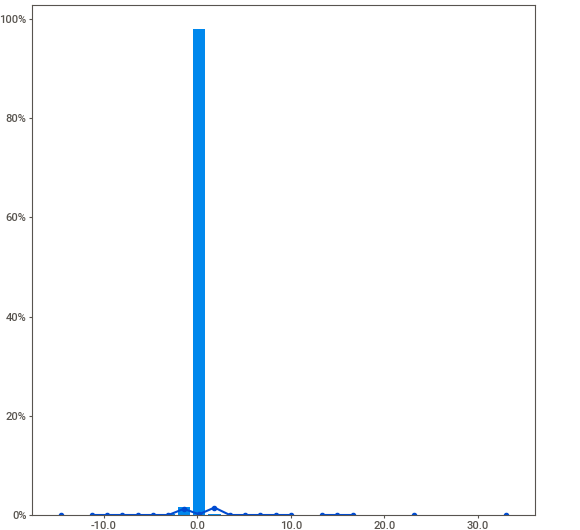
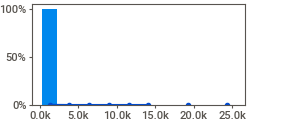
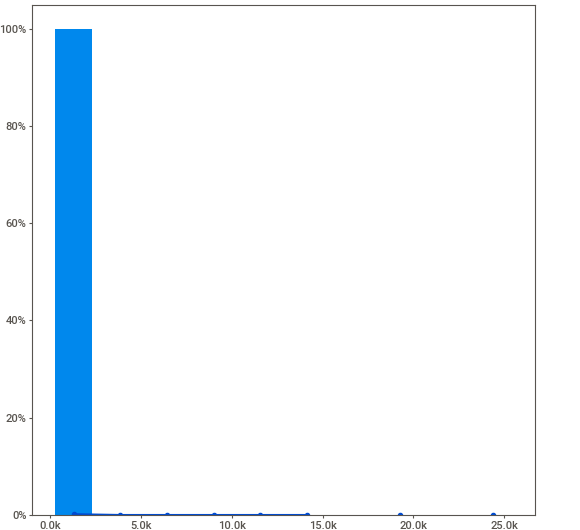
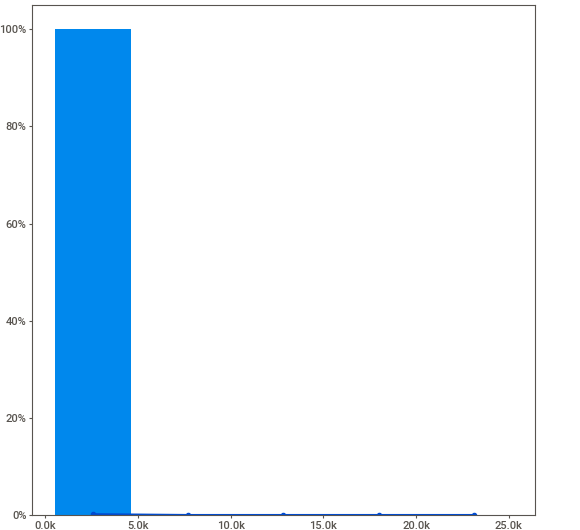
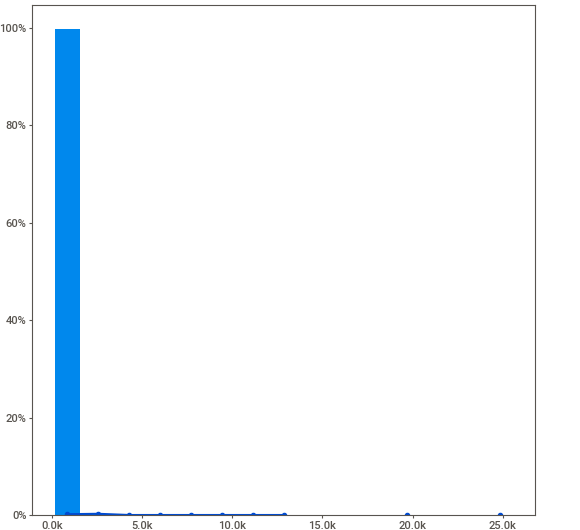
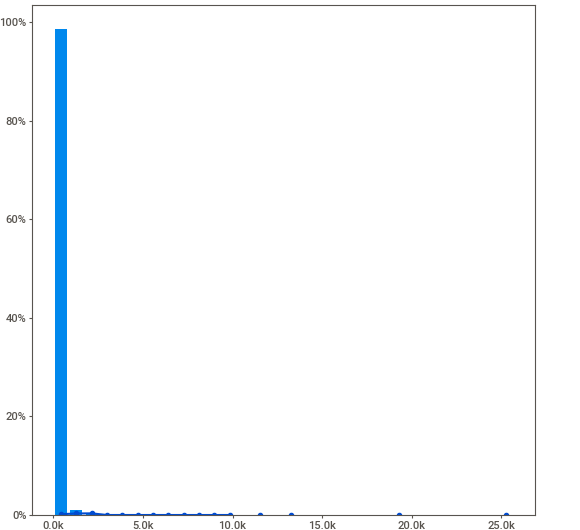
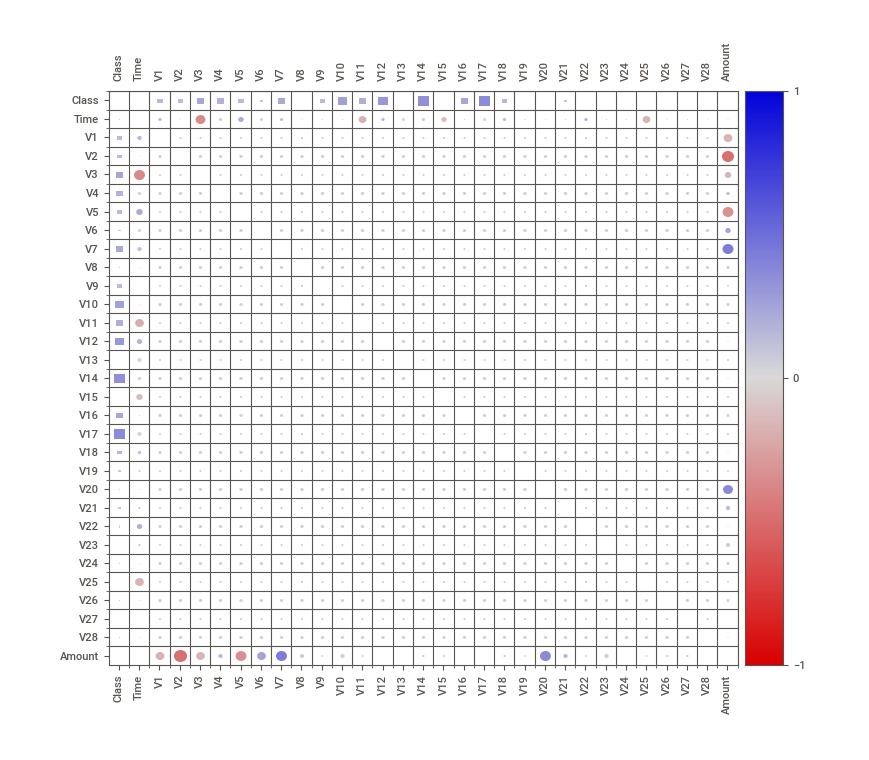
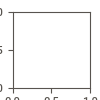

In [12]:
import sweetviz as sv

eda = sv.analyze(source = dados, target_feat = 'Class')
eda.show_notebook()


---
# **Etapa 3.** Pré-processamento dos Dados

Vamos fazer uma modelagem utilizando **Árvores de Decisão**. 

Árvores são excelentes modelos para serem utilizados em uma primeira análise e começar a sentir o conjunto de dados. 

Uma árvore bem ajustada é um algoritmo que costuma oferecer boa performance preditiva.

Além disso, as árvores são robustas em relação a escala das variáveis. 

Portanto, nesse momento, nenhum pré-processamento será feito. 

---
# **Etapa 4.** Processo de Modelagem

In [14]:
from sklearn.model_selection import train_test_split

# x as variáveis para predição. Y a variável predita
x = dados.drop('Class', axis = 1)
y = dados['Class']

# test_size = .2 # 20% para teste e 80% para treino
# stratify vai manter a mesma proporção na variável resposta, impedir o desbalanceamento entrre o treino e o teste
# random_state = 333 # usado para efeito didático para manter o mesmo resultado no código do professor e do aluno. Mantém o resultado fixo.
xtreino, xteste, ytreino, yteste = train_test_split(x, y, test_size = .2, stratify = y)

dadosTreino = pd.concat([xtreino, ytreino], axis = 1)
dadosTeste = pd.concat([xteste, yteste], axis = 1)


In [15]:
import numpy as np

from sklearn.metrics import accuracy_score, recall_score, precision_score, \
                             f1_score, roc_auc_score, confusion_matrix, \
                             classification_report

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV # estratégia para tunagem de hiperparâmetros que serão utilizados
# A árvore tem muito parâmetros (profundidade, regras,... etc) e isso leva a modelos diferentes. 
# A tunagem de hiperparâmetros é procedimento de escolha
from sklearn.model_selection import RepeatedStratifiedKFold # para usar o kfold

validacao = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 1) # 5-fold

In [16]:
def Modelagem(Treino, Teste, nome = 'experimento', iteracoes = 2):
   
    xtreino = Treino.drop('Class', axis = 1)
    ytreino = Treino['Class']    
    
    xteste = Teste.drop('Class', axis = 1)
    yteste = Teste['Class']

    parametros = {  'criterion': ['gini', 'entropy'], # critério de seleção de nós na árvore
                    'max_depth' :[2, 3, 4, 5, 6, 7, 8, 9, 10, 12], # profundidade da árvore
                    'min_samples_split': [10, 20, 30, 40, 50], # minimo de amostra que a árvore continuará se dividindo
                    } # vai testar todas estas combinações de parâmetros
                    # para não olhar todas as combinações, a tunagem pega amostras aleatórias dessas combinações
    # o modelo usado
    modelo = DecisionTreeClassifier() 
    # os hiperparâmetros
    arvore = RandomizedSearchCV(modelo, 
                            param_distributions = parametros,
                            scoring = 'f1', # a métrica desejada
                            cv = validacao, # é o 5-fold já definido
                            n_iter = iteracoes, 
                            n_jobs = -1) # n_jobs = -1 vai usar todos os processadores disponíveis na máquina

    # treinamento - ajustar os dados de treino
    arvore.fit(xtreino, ytreino)
    # predição dos dados de testes
    predicoes = arvore.predict(xteste)
    # métricas
    acc = accuracy_score(predicoes, yteste)
    sen = recall_score(predicoes, yteste) # sensibilidade ou recall
    pre = precision_score(predicoes, yteste)
    f1s = f1_score(predicoes, yteste) # F1-Score = sensibilidade and precisão
    auc = roc_auc_score(predicoes, yteste) # AUC área sobre a curva ROC. A curva ROC "não depende" da matriz de confusão

    medidas = {'Acurácia': [acc], 'Sensibilidade': [sen], 'Precisão': [pre], 'F1-Score': [f1s], 'AUC': [auc]}

    print(classification_report(predicoes, yteste, digits = 4)[:220])

    print('Matriz de Confusão:\n\n', confusion_matrix(predicoes, yteste))

    return pd.DataFrame(medidas, index = [nome]).round(4), arvore

In [17]:
arvore = Modelagem(dadosTreino, dadosTeste, 'Árvore Simples', 10)

              precision    recall  f1-score   support

           0     0.9999    0.9996    0.9997     56878
           1     0.7755    0.9048    0.8352        84

    accuracy                         0.9995     56962
  
Matriz de Confusão:

 [[56856    22]
 [    8    76]]


# Analisando as métricas

Olhando a classe 1 a pessoa pode achar que o modelo está perfeito: acurácia de 99,95%. Mas isso não significa muita coisa.

Olhando a matriz de confusão:
* 56.856 não fraudulentas identificadas corretamente
* 8 não fraudulentas identificadas incorretamente como fraudulenta
* 22  fraudulentas identificadas incorretamente como não fraudulentas
* 76 fraudulentas identificadas corretamente

Analisando as métricas:

* Recall/Sensibilidade: do total de fraudulentas, o modelo consegue identificar 90%.
  * É admissível 10% de não identificação de fraude?
  * Quanto de prejuíjo esse erro acarreta?
* Precision: toda vez que o modelo disse que é fraude, ele acertou apenas 77,55%. Aproximadamente, a cada 4 vezes que o modelo diz que é fraude, 1 não é. 
  * É admissível contranger 25% de transações verdadeiras achando que é fraude?
  * Quanto de prejuíjo esse erro acarreta? 

In [23]:
arvore[0]

Acurácia  Sensibilidade  Precisão  F1-Score     AUC
Árvore Simples    0.9995         0.9048    0.7755    0.8352  0.9522

## **Undersampling**

Reduzir a classe maior até ficar do tamanho da classe menor

In [24]:
def UnderSampling(dados, under = 1):
    classe0 = dados[dados['Class'] == 0]
    classe1 = dados[dados['Class'] == 1]  
    
    amostra0 = classe0.sample(under * classe1.shape[0])
    under = pd.concat([amostra0, classe1])

    return under

In [25]:
under1 = UnderSampling(dadosTreino, 1)  # aqui pega um fraude, um não fraude
under1['Class'].value_counts()/under1.shape[0]

0    0.5
1    0.5
Name: Class, dtype: float64

In [26]:
under1.shape[0] # está balanceado, no entanto jogou muito do conjunto de dados fora. 

788

In [27]:
u1 = Modelagem(under1, dadosTeste, 'UnderSampling 1:1', 10)

              precision    recall  f1-score   support

           0     0.9418    0.9999    0.9700     53564
           1     0.9184    0.0265    0.0515      3398

    accuracy                         0.9418     56962
  
Matriz de Confusão:

 [[53556     8]
 [ 3308    90]]


* Aumentou a precisão, está incomodando menos as pessoas com alarme falso.
* Mas o recall está de 2%, ou seja, perdeu a capacidade de identificar os fraudes.

In [28]:
under2 = UnderSampling(dadosTreino, 3)  # pegar 1 fraude e 3 não fraude
under2['Class'].value_counts()/under2.shape[0]

0    0.75
1    0.25
Name: Class, dtype: float64

In [30]:
u2 = Modelagem(under2, dadosTeste, 'UnderSampling 3:1', 10)

              precision    recall  f1-score   support

           0     0.9820    0.9998    0.9908     55855
           1     0.8673    0.0768    0.1411      1107

    accuracy                         0.9818     56962
  
Matriz de Confusão:

 [[55842    13]
 [ 1022    85]]


In [31]:
under3 = UnderSampling(dadosTreino, 9)  # pegar 1 fraude e 9 não fraude
under3['Class'].value_counts()/under3.shape[0]

0    0.9
1    0.1
Name: Class, dtype: float64

In [32]:
u3 = Modelagem(under3, dadosTeste, 'UnderSampling 9:1', 10)

              precision    recall  f1-score   support

           0     0.9983    0.9998    0.9990     56781
           1     0.8571    0.4641    0.6022       181

    accuracy                         0.9981     56962
  
Matriz de Confusão:

 [[56767    14]
 [   97    84]]


In [33]:
under4 = UnderSampling(dadosTreino, 99)  # pegar 1 fraude e 99 não fraude
under4['Class'].value_counts()/under4.shape[0]

0    0.99
1    0.01
Name: Class, dtype: float64

In [34]:
u4 = Modelagem(under4, dadosTeste, 'UnderSampling 99:1', 10)

              precision    recall  f1-score   support

           0     0.9993    0.9997    0.9995     56840
           1     0.8265    0.6639    0.7364       122

    accuracy                         0.9990     56962
  
Matriz de Confusão:

 [[56823    17]
 [   41    81]]


## **Oversampling**

Maximizar a classe menor até ficar do tamanho da classe maior

In [36]:
# under e over combinadas
def UnderOverSampling(dados, under = 1, over = 1):
    classe0 = dados[dados['Class'] == 0]
    classe1 = dados[dados['Class'] == 1]  

    amostra0 = classe0.sample(under * classe1.shape[0])
    amostra1 = pd.concat([classe1] * over, ignore_index=True)
    tudo = pd.concat([amostra0, amostra1])

    return tudo

In [37]:
over1 = UnderOverSampling(dadosTreino, under = 90, over = 10) # pega 90 não fraude e replica o fraude 10 vezes
over1['Class'].value_counts()/over1.shape[0]

0    0.9
1    0.1
Name: Class, dtype: float64

In [38]:
o1 = Modelagem(over1, dadosTeste, 'OverSampling 10x 9:1', 10)

              precision    recall  f1-score   support

           0     0.9960    0.9998    0.9979     56648
           1     0.8571    0.2675    0.4078       314

    accuracy                         0.9957     56962
  
Matriz de Confusão:

 [[56634    14]
 [  230    84]]


In [39]:
over2 = UnderOverSampling(dadosTreino, under = 75, over = 25) # pega 75 não fraude e replica o fraude 25 vezes
over2['Class'].value_counts()/over2.shape[0]

0    0.75
1    0.25
Name: Class, dtype: float64

In [40]:
o2 = Modelagem(over2, dadosTeste, 'OverSampling 25x 3:1', 5)

              precision    recall  f1-score   support

           0     0.9935    0.9997    0.9966     56513
           1     0.8265    0.1804    0.2962       449

    accuracy                         0.9932     56962
  
Matriz de Confusão:

 [[56496    17]
 [  368    81]]


In [41]:
over3 = UnderOverSampling(dadosTreino, under = 50, over = 50)  # pega 50 não fraude e replica o fraude 50 vezes
over3['Class'].value_counts()/over3.shape[0]

0    0.5
1    0.5
Name: Class, dtype: float64

In [42]:
o3 = Modelagem(over3, dadosTeste, 'OverSampling 50x 1:1', 5)

              precision    recall  f1-score   support

           0     0.9915    0.9997    0.9956     56393
           1     0.8469    0.1459    0.2489       569

    accuracy                         0.9912     56962
  
Matriz de Confusão:

 [[56378    15]
 [  486    83]]


In [43]:
over4 = UnderOverSampling(dadosTreino, under = 450, over = 50) # pega 450 não fraude e replica o fraude 50 vezes
over4['Class'].value_counts()/over4.shape[0]

0    0.9
1    0.1
Name: Class, dtype: float64

In [ ]:
over4.shape[0]

197000

In [44]:
o4 = Modelagem(over4, dadosTeste, 'OverSampling 50x 9:1', 5)

              precision    recall  f1-score   support

           0     0.9982    0.9997    0.9990     56778
           1     0.8367    0.4457    0.5816       184

    accuracy                         0.9979     56962
  
Matriz de Confusão:

 [[56762    16]
 [  102    82]]


In [45]:
o4

(                      Acurácia  Sensibilidade  Precisão  F1-Score     AUC
 OverSampling 50x 9:1    0.9979         0.4457    0.8367    0.5816  0.7227,
 RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=None),
                    estimator=DecisionTreeClassifier(), n_iter=5, n_jobs=-1,
                    param_distributions={'criterion': ['gini', 'entropy'],
                                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                       10, 12],
                                         'min_samples_split': [10, 20, 30, 40,
                                                               50]},
                    scoring='f1'))

In [46]:
over5 = UnderOverSampling(dadosTreino, under = 475, over = 25) # pega 475 não fraude e replica o fraude 25 vezes
over5['Class'].value_counts()/over5.shape[0]

0    0.95
1    0.05
Name: Class, dtype: float64

In [47]:
o5 = Modelagem(over5, dadosTeste, 'OverSampling 25x 20:1', 5)

              precision    recall  f1-score   support

           0     0.9995    0.9997    0.9996     56852
           1     0.8061    0.7182    0.7596       110

    accuracy                         0.9991     56962
  
Matriz de Confusão:

 [[56833    19]
 [   31    79]]


In [48]:
over6 = UnderOverSampling(dadosTreino, under = 490, over = 10) # pega 490 não fraude e replica o fraude 10 vezes
over6['Class'].value_counts()/over6.shape[0]

0    0.98
1    0.02
Name: Class, dtype: float64

In [49]:
o6 = Modelagem(over6, dadosTeste, 'OverSampling 10x 50:1', 5)

              precision    recall  f1-score   support

           0     0.9991    0.9997    0.9994     56829
           1     0.8163    0.6015    0.6926       133

    accuracy                         0.9988     56962
  
Matriz de Confusão:

 [[56811    18]
 [   53    80]]


In [50]:
pd.concat([arvore[0], u1[0], u2[0], u3[0], u4[0], o1[0], o2[0], o3[0], o4[0], o5[0], o6[0]])

Acurácia  Sensibilidade  Precisão  F1-Score     AUC
Árvore Simples           0.9995         0.9048    0.7755    0.8352  0.9522
UnderSampling 1:1        0.9418         0.0265    0.9184    0.0515  0.5132
UnderSampling 3:1        0.9818         0.0768    0.8673    0.1411  0.5383
UnderSampling 9:1        0.9981         0.4641    0.8571    0.6022  0.7319
UnderSampling 99:1       0.9990         0.6639    0.8265    0.7364  0.8318
OverSampling 10x 9:1     0.9957         0.2675    0.8571    0.4078  0.6336
OverSampling 25x 3:1     0.9932         0.1804    0.8265    0.2962  0.5901
OverSampling 50x 1:1     0.9912         0.1459    0.8469    0.2489  0.5728
OverSampling 50x 9:1     0.9979         0.4457    0.8367    0.5816  0.7227
OverSampling 25x 20:1    0.9991         0.7182    0.8061    0.7596  0.8589
OverSampling 10x 50:1    0.9988         0.6015    0.8163    0.6926  0.8006

Comparando o modelo 'OverSampling 25x 20:1' com o modelo 'Árvore Simples':

* Este modelo perdeu sensibilidade (90.48% -> 71,82%), mas ganhou em precisão (77,55% -> 80,61%)
* Para este problema, faz sentido abrir mão de sensibilidade para ganhar em precisão?

## **Ajuste do Ponto de Corte**

In [53]:
from sklearn.metrics import precision_recall_curve 

propensoes = arvore[1].predict_proba(xteste)[:,1]

precision, recall, thresholds = precision_recall_curve(yteste, propensoes)

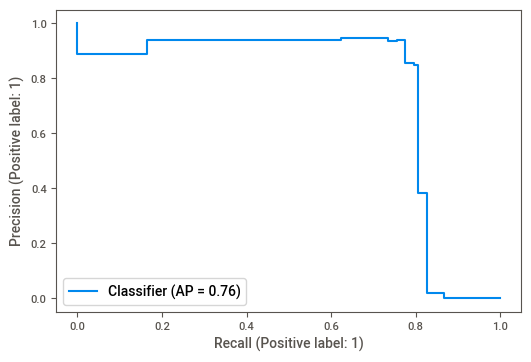

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay 

PrecisionRecallDisplay.from_predictions(yteste, propensoes)
plt.show()

**Precisão x Recall**

* Quando a precisão fica em 1, recall fica em zero
* Quando recall fica em 1, a precisão fica em zero
* O melhor ponto deste gráfico é em precisão próxima de 90% e recall de 80%
  * Achar o ponto de corte que chega a este melhor resultado

In [55]:
#custos
s = 1 # sensibilidade tem peso 1
p = 2 # precisão tem peso 2

aux = pd.DataFrame({ 'Sensibilidade': recall[1:], 'Precisao': precision[1:], 'Corte': thresholds })
aux['Custo'] = (p*aux['Precisao'] + s*aux['Sensibilidade'])/(p+s)
aux.sort_values(by = 'Custo', ascending = False)

Sensibilidade  Precisao     Corte     Custo
10       0.775510  0.938272  0.666667  0.884018
12       0.734694  0.947368  0.888889  0.876477
9        0.775510  0.926829  0.571429  0.876390
11       0.755102  0.936709  0.789474  0.876173
8        0.775510  0.904762  0.363636  0.861678
7        0.795918  0.857143  0.285714  0.836735
5        0.806122  0.849462  0.100000  0.835016
13       0.622449  0.938462  0.967742  0.833124
6        0.795918  0.847826  0.250000  0.830524
4        0.806122  0.840426  0.021413  0.828991
15       0.000000  1.000000  1.000000  0.666667
14       0.163265  0.888889  0.984127  0.647014
3        0.826531  0.382075  0.001738  0.530227
0        0.948980  0.001635  0.000000  0.317416
2        0.826531  0.039784  0.001237  0.302033
1        0.867347  0.017529  0.000111  0.300802

---
# **Etapa 5. Considerações Finais**

## **Conclusões** 
- Consertar o problema de desbalanceamento não é fácil!
- As abordagens apresentadas oferecem modelos diferentes, mas não necessariamente melhores. 
- A análise do ponto de corte pode melhorar bastante os resultados obtidos, permitindo uma escolha mais adequada para o contexto de negócios. 

## **Continuação do Projeto** 
- NearMiss (undersampling) e SMOTE (oversampling)
- Outras tipos de modelos
- Pré-processamento mais aprofundado

---
**_#ftsantos!_** 🚀